# Week: 12
## Group Name: DataThor
### Name: Mohammad Shafiqul Islam
### Email: si_shuvo95@yahoo.com 
### Country: Bangladesh 
### Univeristy: TU Dortmund University
### Specialization: Data Science

**Problem Statement:** XYZ bank wants to roll out Christmas offers to their customers. But Bank does not want to roll out same offer to all customers instead they want to roll out personalized offer to particular set of customers. If they manually start understanding the category of customer then this will be not efficient and also they will not be able to uncover the hidden pattern in the data ( pattern which group certain kind of customer in one category). Bank approached ABC analytics company to solve their problem. Bank also shared information with ABC analytics that they don't want more than 5 group as this will be inefficient for their campaign.

## Loading Data

In [1]:
import pandas as pd
import numpy as np
import zipfile

In [2]:
zf = zipfile.ZipFile('cust_seg.csv.zip')
df = pd.read_csv(zf.open('cust_seg.csv'), header=0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 48 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1000000 non-null  int64  
 1   fecha_dato             1000000 non-null  object 
 2   ncodpers               1000000 non-null  int64  
 3   ind_empleado           989218 non-null   object 
 4   pais_residencia        989218 non-null   object 
 5   sexo                   989214 non-null   object 
 6   age                    1000000 non-null  object 
 7   fecha_alta             989218 non-null   object 
 8   ind_nuevo              989218 non-null   float64
 9   antiguedad             1000000 non-null  object 
 10  indrel                 989218 non-null   float64
 11  ult_fec_cli_1t         1101 non-null     object 
 12  indrel_1mes            989218 non-null   float64
 13  tiprel_1mes            989218 non-null   object 
 14  indresi            

In [5]:
df.describe()

,Unnamed: 0,ncodpers,ind_nuevo,indrel,indrel_1mes,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1000000.000000,1.000000e+06,989218.000000,989218.000000,989218.000000,989218.0,982266.000000,989218.000000,8.248170e+05,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,994598.000000,994598.000000,1000000.000000
mean,499999.500000,6.905967e+05,0.000489,1.109074,1.000085,1.0,26.852131,0.564971,1.396462e+05,0.000177,0.000039,0.749626,0.000591,0.105296,0.013623,0.009894,0.212486,0.072079,0.002158,0.003150,0.066881,0.106267,0.027182,0.009982,0.014553,0.004661,0.072581,0.066084,0.039378,0.006442,0.071629,0.079543,0.166275
std,288675.278933,4.044084e+05,0.022114,3.267624,0.012954,0.0,12.422924,0.495761,2.389858e+05,0.013303,0.006245,0.433229,0.024303,0.306935,0.115920,0.098975,0.409067,0.258619,0.046404,0.056036,0.249816,0.308179,0.162614,0.099410,0.119755,0.068112,0.259448,0.248429,0.194493,0.080003,0.257873,0.270584,0.372327
min,0.000000,1.588900e+04,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,1.202730e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,249999.750000,3.364110e+05,0.000000,1.000000,1.000000,1.0,18.000000,0.000000,7.157184e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,499999.500000,6.644760e+05,0.000000,1.000000,1.000000,1.0,28.000000,1.000000,1.066519e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,749999.250000,1.074511e+06,0.000000,1.000000,1.000000,1.0,33.000000,1.000000,1.634325e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,999999.000000,1.379131e+06,1.000000,99.000000,3.000000,1.0,52.000000,1.000000,2.889440e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df1 = df.drop_duplicates()
df1.shape

(1000000, 48)

In [7]:
df1.isnull().sum()

Unnamed: 0                    0
fecha_dato                    0
ncodpers                      0
ind_empleado              10782
pais_residencia           10782
sexo                      10786
age                           0
fecha_alta                10782
ind_nuevo                 10782
antiguedad                    0
indrel                    10782
ult_fec_cli_1t           998899
indrel_1mes               10782
tiprel_1mes               10782
indresi                   10782
indext                    10782
conyuemp                 999822
canal_entrada             10861
indfall                   10782
tipodom                   10782
cod_prov                  17734
nomprov                   17734
ind_actividad_cliente     10782
renta                    175183
ind_ahor_fin_ult1             0
ind_aval_fin_ult1             0
ind_cco_fin_ult1              0
ind_cder_fin_ult1             0
ind_cno_fin_ult1              0
ind_ctju_fin_ult1             0
ind_ctma_fin_ult1             0
ind_ctop

## Handling Missing Values

In [8]:
print("Number of Categories in: ")
for ColName in df1[['ind_empleado','pais_residencia','sexo', 'fecha_alta', 'ind_nuevo', 'indrel', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov', 'nomprov', 'ind_actividad_cliente', 'renta', 'ind_nomina_ult1', 'ind_nom_pens_ult1']]:
    print("{} = {}".format(ColName, len(df[ColName].unique())))

Number of Categories in: 
ind_empleado = 6
pais_residencia = 114
sexo = 3
fecha_alta = 6239
ind_nuevo = 3
indrel = 3
ult_fec_cli_1t = 23
indrel_1mes = 4
tiprel_1mes = 4
indresi = 3
indext = 3
conyuemp = 3
canal_entrada = 157
indfall = 3
tipodom = 2
cod_prov = 53
nomprov = 53
ind_actividad_cliente = 3
renta = 395669
ind_nomina_ult1 = 3
ind_nom_pens_ult1 = 3


In [9]:
# Replacing missing category values with most frequent values
df2 = df1.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [10]:
df2.isnull().sum()

Unnamed: 0               0
fecha_dato               0
ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
ult_fec_cli_1t           0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
conyuemp                 0
canal_entrada            0
indfall                  0
tipodom                  0
cod_prov                 0
nomprov                  0
ind_actividad_cliente    0
renta                    0
ind_ahor_fin_ult1        0
ind_aval_fin_ult1        0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
i

In [11]:
# Filling with Unknown class (Another way)
df3 = df1.fillna("Unknown")

In [12]:
df3.isnull().sum()

Unnamed: 0               0
fecha_dato               0
ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
ult_fec_cli_1t           0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
conyuemp                 0
canal_entrada            0
indfall                  0
tipodom                  0
cod_prov                 0
nomprov                  0
ind_actividad_cliente    0
renta                    0
ind_ahor_fin_ult1        0
ind_aval_fin_ult1        0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
i

In [13]:
# Model Based imputation using sklearn-pandas package
from sklearn_pandas import CategoricalImputer
  
# Handling NaN values
imputer = CategoricalImputer()
data = np.array(df1, dtype=object)
df_array = imputer.fit_transform(data)

In [14]:
col_names = df1.columns.tolist()

In [15]:
df4 = pd.DataFrame(df_array, columns = col_names)

In [16]:
df4.isnull().sum()

Unnamed: 0               0
fecha_dato               0
ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
ult_fec_cli_1t           0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
conyuemp                 0
canal_entrada            0
indfall                  0
tipodom                  0
cod_prov                 0
nomprov                  0
ind_actividad_cliente    0
renta                    0
ind_ahor_fin_ult1        0
ind_aval_fin_ult1        0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
i

## Handling NA values

In [17]:
print("Values of Categories in: ")
for ColName in df2:
    print("{} = {}".format(ColName, (df2[ColName].unique())))

Values of Categories in: 
Unnamed: 0 = [     0      1      2 ... 999997 999998 999999]
fecha_dato = ['2015-01-28' '2015-02-28']
ncodpers = [1375586 1050611 1050612 ... 1149999 1150908 1183305]
ind_empleado = ['N' 'A' 'B' 'F' 'S']
pais_residencia = ['ES' 'CA' 'CH' 'CL' 'IE' 'AT' 'NL' 'FR' 'GB' 'DE' 'DO' 'BE' 'AR' 'VE'
 'US' 'MX' 'BR' 'IT' 'EC' 'PE' 'CO' 'HN' 'FI' 'SE' 'AL' 'PT' 'MZ' 'CN'
 'TW' 'PL' 'IN' 'CR' 'NI' 'HK' 'AD' 'CZ' 'AE' 'MA' 'GR' 'PR' 'RO' 'IL'
 'RU' 'GT' 'GA' 'NO' 'SN' 'MR' 'UA' 'BG' 'PY' 'EE' 'SV' 'ET' 'CM' 'SA'
 'CI' 'QA' 'LU' 'PA' 'BA' 'BO' 'AU' 'BY' 'KE' 'SG' 'HR' 'MD' 'SK' 'TR'
 'AO' 'CU' 'GQ' 'EG' 'ZA' 'DK' 'UY' 'GE' 'TH' 'DZ' 'LB' 'JP' 'NG' 'PK'
 'TN' 'TG' 'KR' 'GH' 'RS' 'VN' 'PH' 'KW' 'NZ' 'MM' 'KH' 'GI' 'SL' 'GN'
 'GW' 'OM' 'CG' 'LV' 'LT' 'ML' 'MK' 'HU' 'IS' 'LY' 'CF' 'GM' 'KZ' 'CD'
 'BZ']
sexo = ['H' 'V']
age = [' 35' ' 23' ' 22' ' 24' ' 65' ' 28' ' 25' ' 26' ' 53' ' 27' ' 32' ' 37'
 ' 31' ' 39' ' 63' ' 33' ' 55' ' 42' ' 58' ' 38' ' 50' ' 30' ' 45' ' 44'
 ' 36' '

In [18]:
# Treating unexpected values
df2 =  df2[df2.age != ' NA']
df2 =  df2[df2.antiguedad != '-999999']

In [19]:
print("Values of Categories in: ")
for ColName in df2:
    print("{} = {}".format(ColName, (df2[ColName].unique())))

Values of Categories in: 
Unnamed: 0 = [     0      1      2 ... 999997 999998 999999]
fecha_dato = ['2015-01-28' '2015-02-28']
ncodpers = [1375586 1050611 1050612 ... 1149999 1150908 1183305]
ind_empleado = ['N' 'A' 'B' 'F' 'S']
pais_residencia = ['ES' 'CA' 'CH' 'CL' 'IE' 'AT' 'NL' 'FR' 'GB' 'DE' 'DO' 'BE' 'AR' 'VE'
 'US' 'MX' 'BR' 'IT' 'EC' 'PE' 'CO' 'HN' 'FI' 'SE' 'AL' 'PT' 'MZ' 'CN'
 'TW' 'PL' 'IN' 'CR' 'NI' 'HK' 'AD' 'CZ' 'AE' 'MA' 'GR' 'PR' 'RO' 'IL'
 'RU' 'GT' 'GA' 'NO' 'SN' 'MR' 'UA' 'BG' 'PY' 'EE' 'SV' 'ET' 'CM' 'SA'
 'CI' 'QA' 'LU' 'PA' 'BA' 'BO' 'AU' 'BY' 'KE' 'SG' 'HR' 'MD' 'SK' 'TR'
 'AO' 'CU' 'GQ' 'EG' 'ZA' 'DK' 'UY' 'GE' 'TH' 'DZ' 'LB' 'JP' 'NG' 'PK'
 'TN' 'TG' 'KR' 'GH' 'RS' 'VN' 'PH' 'KW' 'NZ' 'MM' 'KH' 'GI' 'SL' 'GN'
 'GW' 'OM' 'CG' 'LV' 'LT' 'ML' 'MK' 'HU' 'IS' 'LY' 'CF' 'GM' 'KZ' 'CD'
 'BZ']
sexo = ['H' 'V']
age = [' 35' ' 23' ' 22' ' 24' ' 65' ' 28' ' 25' ' 26' ' 53' ' 27' ' 32' ' 37'
 ' 31' ' 39' ' 63' ' 33' ' 55' ' 42' ' 58' ' 38' ' 50' ' 30' ' 45' ' 44'
 ' 36' '

## Feature Engineering

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df2.head()

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,2015-07-01,1.0,A,S,N,N,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,2015-07-01,1.0,I,S,S,N,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,2015-07-01,1.0,I,S,N,N,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,2015-07-01,1.0,I,S,N,N,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,2015-07-01,1.0,A,S,N,N,KHE,N,1.0,50.0,ZARAGOZA,1.0,451931.22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989214 entries, 0 to 999999
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             989214 non-null  int64  
 1   fecha_dato             989214 non-null  object 
 2   ncodpers               989214 non-null  int64  
 3   ind_empleado           989214 non-null  object 
 4   pais_residencia        989214 non-null  object 
 5   sexo                   989214 non-null  object 
 6   age                    989214 non-null  object 
 7   fecha_alta             989214 non-null  object 
 8   ind_nuevo              989214 non-null  float64
 9   antiguedad             989214 non-null  object 
 10  indrel                 989214 non-null  float64
 11  ult_fec_cli_1t         989214 non-null  object 
 12  indrel_1mes            989214 non-null  float64
 13  tiprel_1mes            989214 non-null  object 
 14  indresi                989214 non-nu

In [23]:
# These columns are irrelevant
df2.drop('Unnamed: 0', axis=1, inplace=True)
df2.drop('fecha_dato', axis=1, inplace=True)
df2.drop('ncodpers', axis=1, inplace=True)
df2.drop('fecha_alta', axis=1, inplace=True)
df2.drop('ult_fec_cli_1t', axis=1, inplace=True)
df2.drop('canal_entrada', axis=1, inplace=True)
df2.drop('indfall', axis=1, inplace=True)
df2.drop('tipodom', axis=1, inplace=True)
df2.drop('nomprov', axis=1, inplace=True)

df2.head()

,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,N,ES,H,35,0.0,6,1.0,1.0,A,S,N,N,29.0,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,N,ES,V,23,0.0,35,1.0,1.0,I,S,S,N,13.0,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,N,ES,V,23,0.0,35,1.0,1.0,I,S,N,N,13.0,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,N,ES,H,22,0.0,35,1.0,1.0,I,S,N,N,50.0,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,N,ES,V,23,0.0,35,1.0,1.0,A,S,N,N,50.0,1.0,451931.22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [24]:
# Converting to numeric values
df2['age'] = pd.to_numeric(df2['age'])
df2['antiguedad'] = pd.to_numeric(df2['antiguedad'])

In [25]:
df2.head()

,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,N,ES,H,35,0.0,6,1.0,1.0,A,S,N,N,29.0,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,N,ES,V,23,0.0,35,1.0,1.0,I,S,S,N,13.0,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,N,ES,V,23,0.0,35,1.0,1.0,I,S,N,N,13.0,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,N,ES,H,22,0.0,35,1.0,1.0,I,S,N,N,50.0,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,N,ES,V,23,0.0,35,1.0,1.0,A,S,N,N,50.0,1.0,451931.22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [26]:
df2["sexo"].replace({"H": 0, "V": 1}, inplace=True)
df2.head()

,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,N,ES,0,35,0.0,6,1.0,1.0,A,S,N,N,29.0,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,N,ES,1,23,0.0,35,1.0,1.0,I,S,S,N,13.0,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,N,ES,1,23,0.0,35,1.0,1.0,I,S,N,N,13.0,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,N,ES,0,22,0.0,35,1.0,1.0,I,S,N,N,50.0,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,N,ES,1,23,0.0,35,1.0,1.0,A,S,N,N,50.0,1.0,451931.22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


Text(0.5, 1.0, 'Gender Distribution- MALE (0) vs FEMALE (1)')

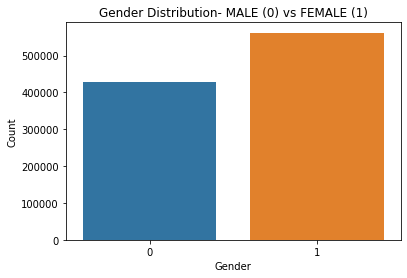

In [27]:
# Checking distribution of different gender
ax = sns.countplot(x="sexo", data=df2)
ax.set(xlabel = 'Gender', ylabel = 'Count')
ax.set_title("Gender Distribution- MALE (0) vs FEMALE (1)")

Text(0.5, 1.0, 'Age Distribution')

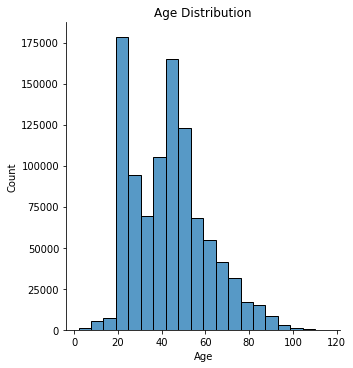

In [28]:
# Checking distribution of different Age
ax = sns.displot(df2, x="age", bins=20)
ax.set(xlabel = 'Age', ylabel = 'Count')
plt.title("Age Distribution")

In [29]:
# Customer count based on location
df2['pais_residencia'].value_counts()

ES    982260
FR       546
AR       542
DE       487
GB       480
       ...  
LB         2
MM         2
LV         2
KZ         2
AL         1
Name: pais_residencia, Length: 113, dtype: int64

In [30]:
# As location has no impact
df2.drop('pais_residencia', axis=1, inplace=True)
df2.head()

,ind_empleado,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,N,0,35,0.0,6,1.0,1.0,A,S,N,N,29.0,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,N,1,23,0.0,35,1.0,1.0,I,S,S,N,13.0,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,N,1,23,0.0,35,1.0,1.0,I,S,N,N,13.0,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,N,0,22,0.0,35,1.0,1.0,I,S,N,N,50.0,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,N,1,23,0.0,35,1.0,1.0,A,S,N,N,50.0,1.0,451931.22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


Text(0.5, 1.0, 'Employee: (A) active, (B) ex employed, (F) filial, (N) not employee, (P) pasive')

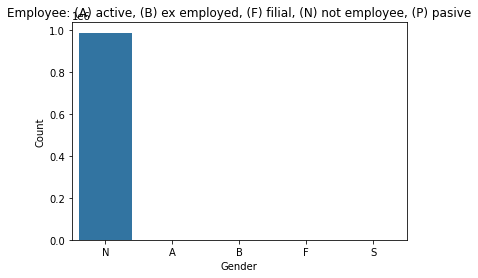

In [31]:
# Employee status count
ax = sns.countplot(x="ind_empleado", data=df2)
ax.set(xlabel = 'Gender', ylabel = 'Count')
ax.set_title("Employee: (A) active, (B) ex employed, (F) filial, (N) not employee, (P) pasive")

In [32]:
# As Employee status has no impact
df2.drop('ind_empleado', axis=1, inplace=True)
df2.head()

,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,35,0.0,6,1.0,1.0,A,S,N,N,29.0,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1,23,0.0,35,1.0,1.0,I,S,S,N,13.0,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,1,23,0.0,35,1.0,1.0,I,S,N,N,13.0,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,0,22,0.0,35,1.0,1.0,I,S,N,N,50.0,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,1,23,0.0,35,1.0,1.0,A,S,N,N,50.0,1.0,451931.22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


Text(0.5, 1.0, 'Customer seniority (in months)')

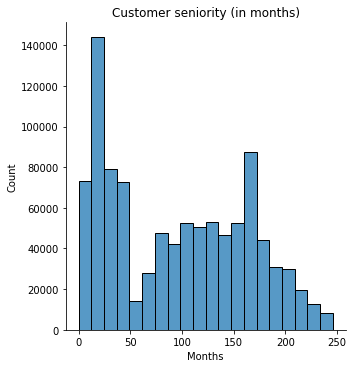

In [33]:
# Checking distribution of Customer seniority (in months)
ax = sns.displot(df2, x="antiguedad", bins=20)
ax.set(xlabel = 'Months', ylabel = 'Count')
plt.title("Customer seniority (in months)")

In [34]:
# Checking distribution of being Primary customer
df2['indrel'].value_counts()

1.0     988113
99.0      1101
Name: indrel, dtype: int64

In [35]:
df2["indrel"].replace({1.0: 1, 99.0: 0}, inplace=True)
df2.head()

,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,35,0.0,6,1.0,1.0,A,S,N,N,29.0,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1,23,0.0,35,1.0,1.0,I,S,S,N,13.0,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,1,23,0.0,35,1.0,1.0,I,S,N,N,13.0,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,0,22,0.0,35,1.0,1.0,I,S,N,N,50.0,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,1,23,0.0,35,1.0,1.0,A,S,N,N,50.0,1.0,451931.22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [36]:
# Customer relation type at the beginning of the month
df2['indrel_1mes'].value_counts()

1.0    989171
3.0        41
2.0         2
Name: indrel_1mes, dtype: int64

In [37]:
# As Customer type has no impact
df2.drop('indrel_1mes', axis=1, inplace=True)
df2.head()

,sexo,age,ind_nuevo,antiguedad,indrel,tiprel_1mes,indresi,indext,conyuemp,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,35,0.0,6,1.0,A,S,N,N,29.0,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1,23,0.0,35,1.0,I,S,S,N,13.0,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,1,23,0.0,35,1.0,I,S,N,N,13.0,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,0,22,0.0,35,1.0,I,S,N,N,50.0,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,1,23,0.0,35,1.0,A,S,N,N,50.0,1.0,451931.22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [38]:
# Checking customer relation type
df2['tiprel_1mes'].value_counts()

A    547796
I    441377
P        41
Name: tiprel_1mes, dtype: int64

In [39]:
# As we do not need to consider the former customers, we will removed them
df2 =  df2[df2.tiprel_1mes != 'P']
df2['tiprel_1mes'].value_counts()

A    547796
I    441377
Name: tiprel_1mes, dtype: int64

In [40]:
df2["tiprel_1mes"].replace({"A": 1, "I": 0}, inplace=True)
df2.head()

,sexo,age,ind_nuevo,antiguedad,indrel,tiprel_1mes,indresi,indext,conyuemp,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,35,0.0,6,1.0,1,S,N,N,29.0,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1,23,0.0,35,1.0,0,S,S,N,13.0,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,1,23,0.0,35,1.0,0,S,N,N,13.0,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,0,22,0.0,35,1.0,0,S,N,N,50.0,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,1,23,0.0,35,1.0,1,S,N,N,50.0,1.0,451931.22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


Text(0.5, 1.0, 'Customer relation type at the beginning of the month, Active (1), Inactive (0)')

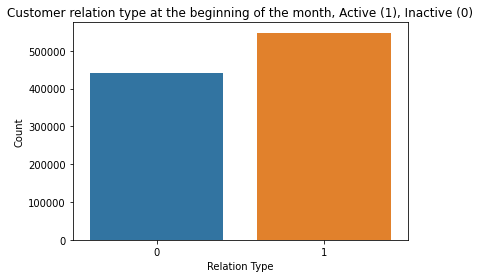

In [41]:
# Checking Customer relation distribution
ax = sns.countplot(x="tiprel_1mes", data=df2)
ax.set(xlabel = 'Relation Type', ylabel = 'Count')
ax.set_title("Customer relation type at the beginning of the month, Active (1), Inactive (0)")

In [42]:
# Checking residence status
df2['indresi'].value_counts()

S    982219
N      6954
Name: indresi, dtype: int64

In [43]:
df2["indresi"].replace({"S": 1, "N": 0}, inplace=True)
df2.head()

,sexo,age,ind_nuevo,antiguedad,indrel,tiprel_1mes,indresi,indext,conyuemp,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,35,0.0,6,1.0,1,1,N,N,29.0,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1,23,0.0,35,1.0,0,1,S,N,13.0,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,1,23,0.0,35,1.0,0,1,N,N,13.0,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,0,22,0.0,35,1.0,0,1,N,N,50.0,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,1,23,0.0,35,1.0,1,1,N,N,50.0,1.0,451931.22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [44]:
# Checking birth country status
df2['indext'].value_counts()

N    946283
S     42890
Name: indext, dtype: int64

In [45]:
df2["indext"].replace({"S": 1, "N": 0}, inplace=True)
df2.head()

,sexo,age,ind_nuevo,antiguedad,indrel,tiprel_1mes,indresi,indext,conyuemp,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,35,0.0,6,1.0,1,1,0,N,29.0,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1,23,0.0,35,1.0,0,1,1,N,13.0,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,1,23,0.0,35,1.0,0,1,0,N,13.0,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,0,22,0.0,35,1.0,0,1,0,N,50.0,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,1,23,0.0,35,1.0,1,1,0,N,50.0,1.0,451931.22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [46]:
# Checking spouse status
df2['conyuemp'].value_counts()

N    989171
S         2
Name: conyuemp, dtype: int64

In [47]:
# As spouse status has no impact
df2.drop('conyuemp', axis=1, inplace=True)
df2.head()

,sexo,age,ind_nuevo,antiguedad,indrel,tiprel_1mes,indresi,indext,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,35,0.0,6,1.0,1,1,0,29.0,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1,23,0.0,35,1.0,0,1,1,13.0,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,1,23,0.0,35,1.0,0,1,0,13.0,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,0,22,0.0,35,1.0,0,1,0,50.0,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,1,23,0.0,35,1.0,1,1,0,50.0,1.0,451931.22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


Text(0.5, 1.0, 'Active (1.0) or Inactive (0.0) Customer based on Gender and Seniority')

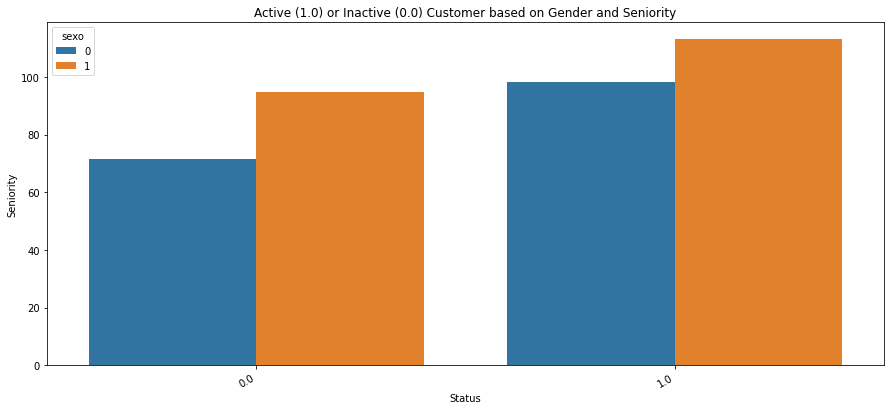

In [48]:
# Finding if the customers are active or inactive based on Gender and Seniority
plt.figure(figsize=[15,7])
ax=sns.barplot(x='ind_actividad_cliente', y='antiguedad', hue='sexo', data=df2, ci=None)
ax.set(xlabel = 'Status', ylabel='Seniority')
ax.get_figure().autofmt_xdate()
ax.set_title("Active (1.0) or Inactive (0.0) Customer based on Gender and Seniority")

Text(0.5, 1.0, 'Income of the Cusotmer Based on Seniority')

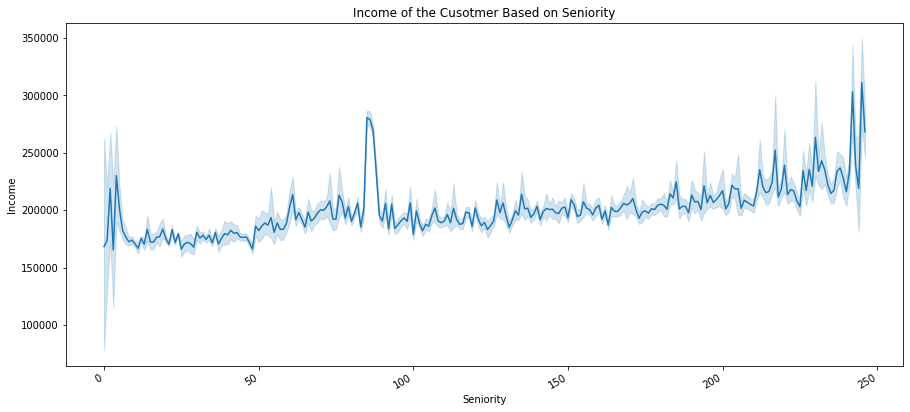

In [49]:
# Finding the income of the customer based on Seniority
plt.figure(figsize=[15,7])
ax=sns.lineplot(x='antiguedad', y='renta', data=df2)
ax.set(xlabel = 'Seniority', ylabel='Income')
ax.get_figure().autofmt_xdate()
ax.set_title("Income of the Cusotmer Based on Seniority")

In [50]:
df2.shape

(989173, 35)

In [51]:
df2.head()

,sexo,age,ind_nuevo,antiguedad,indrel,tiprel_1mes,indresi,indext,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,35,0.0,6,1.0,1,1,0,29.0,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1,23,0.0,35,1.0,0,1,1,13.0,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,1,23,0.0,35,1.0,0,1,0,13.0,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,0,22,0.0,35,1.0,0,1,0,50.0,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,1,23,0.0,35,1.0,1,1,0,50.0,1.0,451931.22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

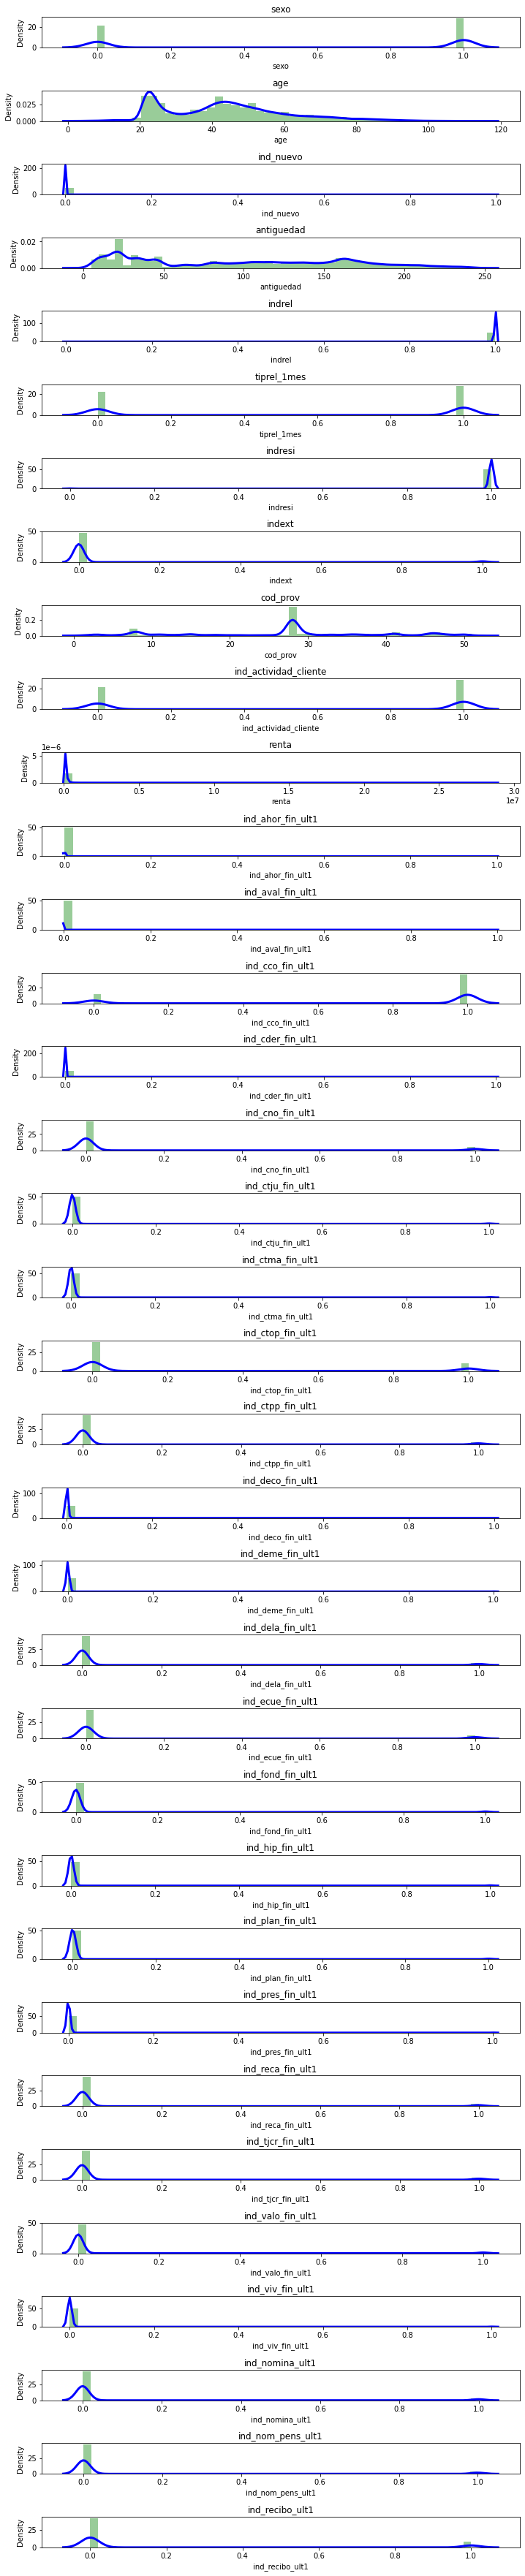

In [ ]:
# Plotting KDE (Kernel Density Estimation)
plt.figure(figsize=(10,50))
for i in range(len(df2.columns)):
  plt.subplot(36, 1, i+1)
  sns.distplot(df2[df2.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(df2.columns[i])

plt.tight_layout()

In [ ]:
# Finding the correlations
correlations = df2.corr()

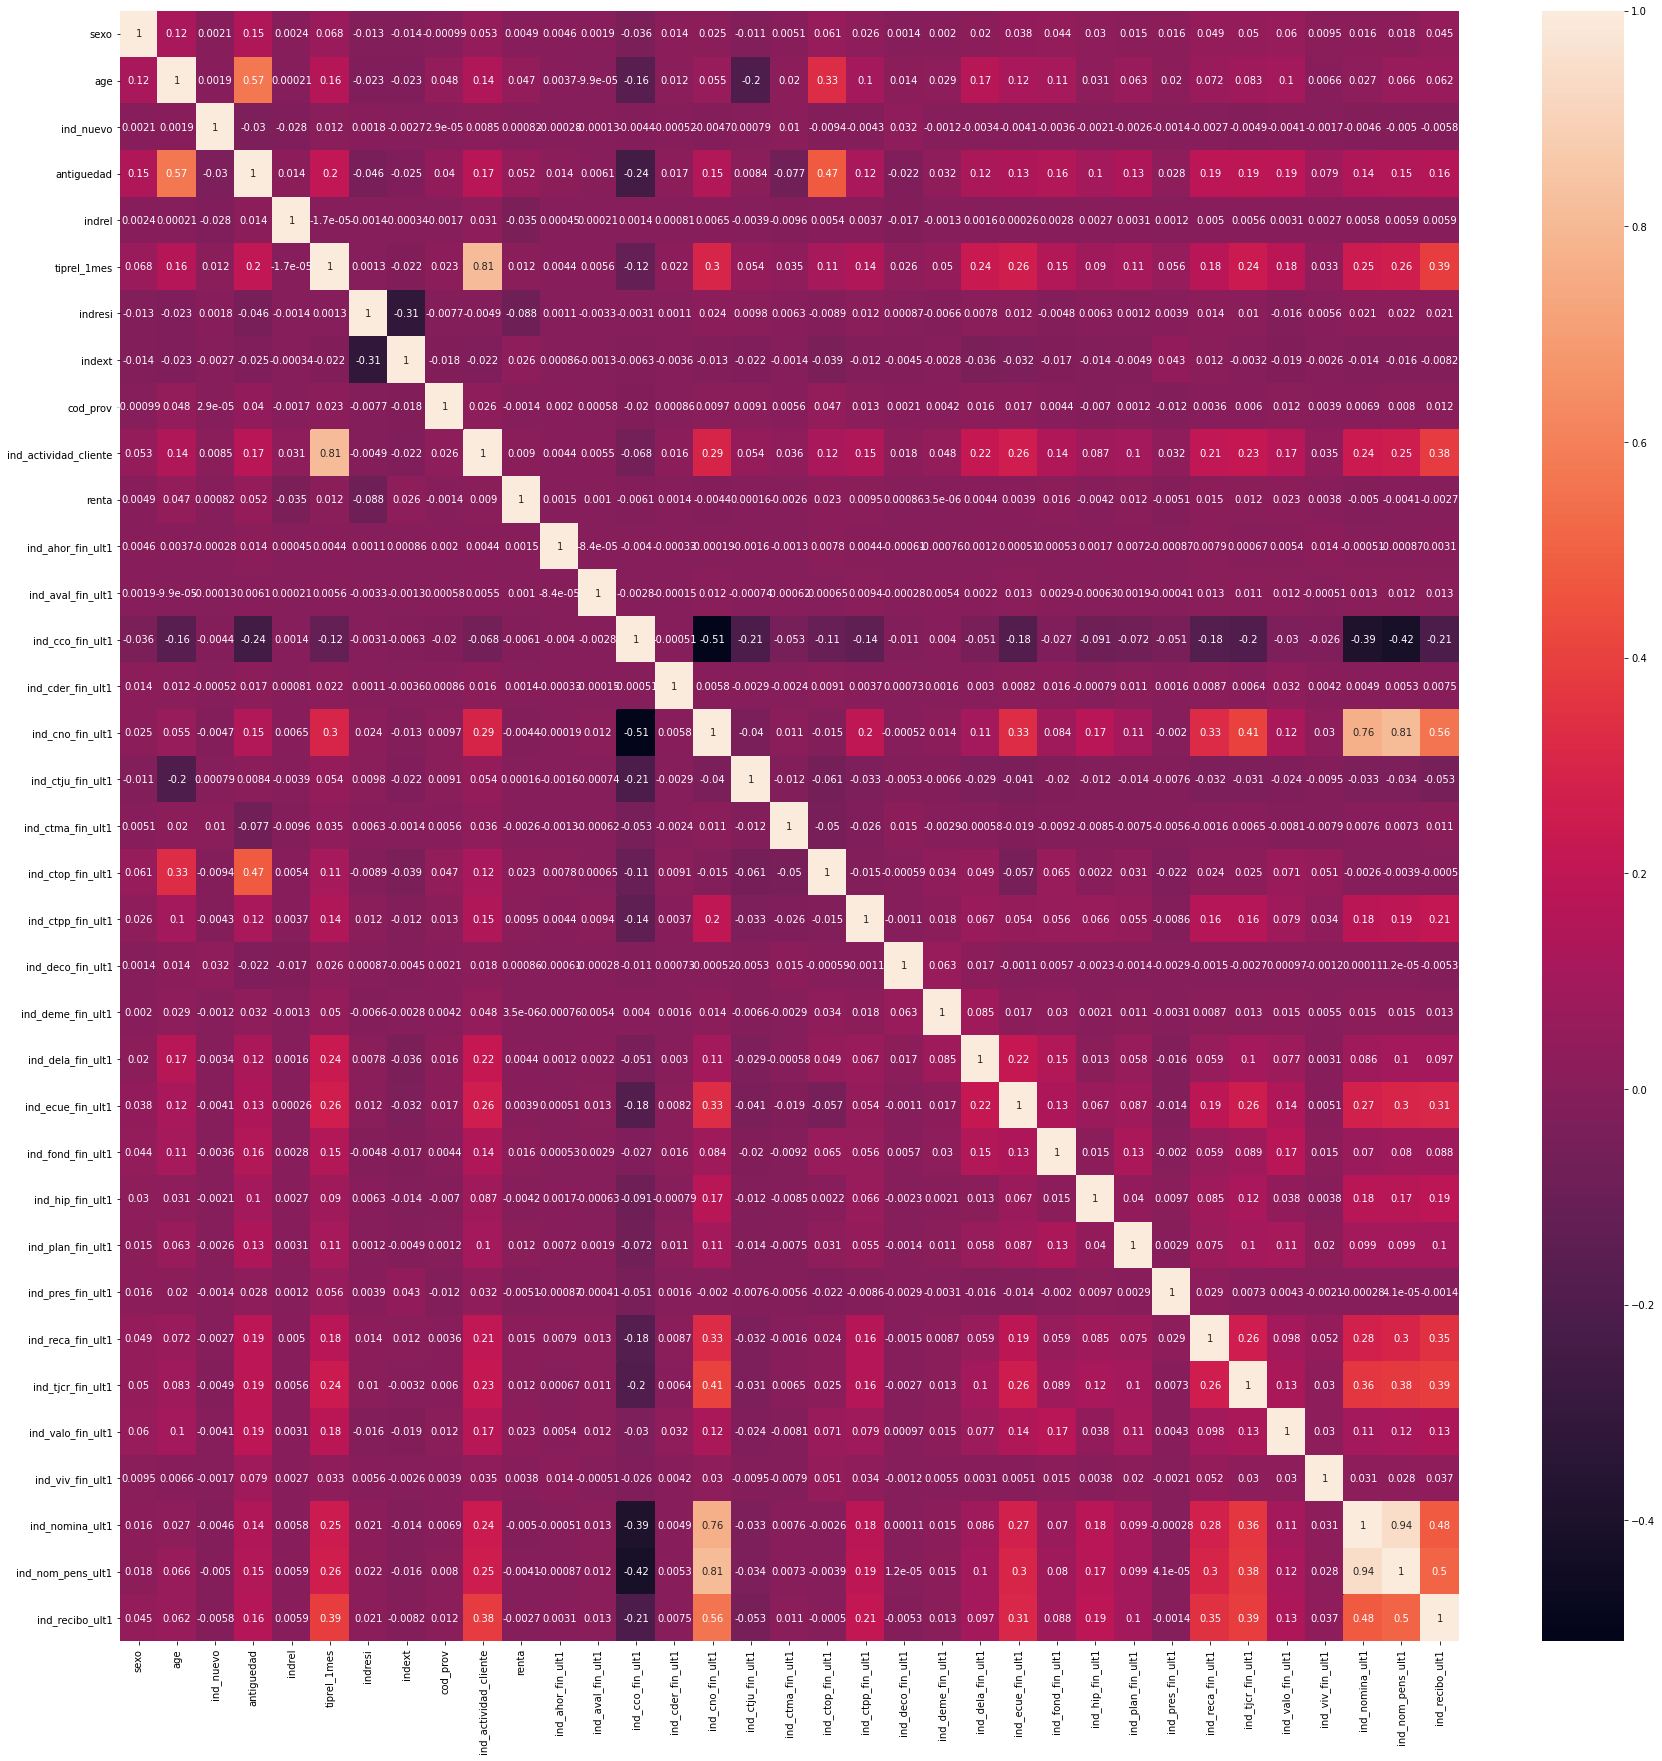

In [ ]:
# Plotting correlations
f, ax = plt.subplots(figsize = (30, 30))
sns.heatmap(correlations, annot = True)

## Model Building

In [52]:
# Scaling the data
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)

In [53]:
df2_scaled.shape

(989173, 35)

In [ ]:
df2_scaled

array([[-1.14692953, -0.48197373, -0.02126257, ..., -0.27834181,
        -0.29457832, -0.44871801],
       [ 0.87189315, -1.18134484, -0.02126257, ..., -0.27834181,
        -0.29457832, -0.44871801],
       [ 0.87189315, -1.18134484, -0.02126257, ..., -0.27834181,
        -0.29457832, -0.44871801],
       ...,
       [ 0.87189315, -0.24885003, -0.02126257, ..., -0.27834181,
        -0.29457832,  2.22857114],
       [ 0.87189315, -0.4236928 , -0.02126257, ..., -0.27834181,
        -0.29457832,  2.22857114],
       [-1.14692953, -0.30713095, -0.02126257, ..., -0.27834181,
        -0.29457832,  2.22857114]])

### Base Model: K-Means

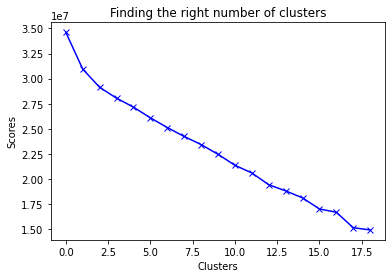

In [ ]:
# Finding the optimal number of cluster using Elbow Methos
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df2_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

Using the elbow method, we can see that 3 is the optimal number of cluster.

In [ ]:
kmeans = KMeans(3)
kmeans.fit(df2_scaled)
labels = kmeans.labels_

In [ ]:
# Cluster centers
kmeans.cluster_centers_.shape

(3, 35)

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df2.columns])
cluster_centers

,sexo,age,ind_nuevo,antiguedad,indrel,tiprel_1mes,indresi,indext,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0.080085,0.221652,-0.017528,0.554917,0.021140,0.892426,0.070979,-0.050949,0.027898,0.864664,-0.008288,-0.000663,0.053311,-1.431862,0.019746,2.773618,-0.117079,0.016505,-0.018757,0.693818,-0.002942,0.050039,0.356546,1.076469,0.294305,0.642434,0.379302,0.001636,1.118804,1.430828,0.427038,0.107167,2.836465,2.987637,1.765494
1,0.067475,0.179468,0.013347,0.160644,0.021928,0.808107,-0.008595,-0.028492,0.026819,0.789173,0.016611,0.007062,-0.004206,0.147145,0.019263,-0.208899,0.077652,0.031146,0.190697,0.026911,0.023346,0.043746,0.183557,0.080651,0.104050,-0.027152,0.043374,0.059925,0.009453,-0.020937,0.111264,0.023579,-0.277267,-0.291072,0.078214
2,-0.086710,-0.232362,-0.010464,-0.279437,-0.027200,-1.025108,-0.005223,0.040048,-0.033676,-0.999717,-0.015734,-0.007262,-0.006279,0.132857,-0.024130,-0.337079,-0.057856,-0.035924,-0.195942,-0.167225,-0.023859,-0.055840,-0.263677,-0.300186,-0.167942,-0.100312,-0.121435,-0.063082,-0.234111,-0.264817,-0.202097,-0.046169,-0.278078,-0.293916,-0.435718


In [ ]:
# Performing inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df2.columns])
cluster_centers

,sexo,age,ind_nuevo,antiguedad,indrel,tiprel_1mes,indresi,indext,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0.607787,47.072996,0.000079,133.670034,0.999592,0.997415,0.998900,0.032983,27.205642,0.993639,189496.508982,0.000170,3.741624e-04,0.137907,0.001077,0.960600,0.000045,0.011406,0.206322,0.252707,0.001916,0.005998,0.156967,0.439323,7.550143e-02,0.073914,0.060308,0.004275,0.355896,0.423631,0.123111,0.015103,0.804642,0.889667,0.827035
1,0.601541,46.349205,0.000736,107.716185,0.999618,0.955500,0.992252,0.037557,27.192283,0.956214,195653.067674,0.000273,1.301863e-05,0.817659,0.001065,0.041818,0.022609,0.012847,0.292227,0.079620,0.003105,0.005644,0.113564,0.131731,4.442607e-02,0.007297,0.019901,0.008030,0.072566,0.061459,0.061444,0.008388,0.000278,0.000950,0.196816
2,0.525167,39.282905,0.000229,78.746888,0.997980,0.044213,0.992533,0.051516,26.443381,0.069353,187655.282600,0.000082,-1.373684e-16,0.811508,0.000007,0.002331,0.006908,0.006246,0.133652,0.029234,0.000970,0.000036,0.001352,0.014097,2.364775e-14,0.000018,0.000077,0.000105,0.010359,0.000618,0.000248,0.002786,0.000068,0.000180,0.004856


### Clusters (Base Model)
**Cluster 0:** These customers have the following notable attributes:
- Most Seniority (~133 months)
- Active Customer
- Low Income (~189000)
- No Current Accounts
- Payroll Account
- Payrolls
- Pensions
- Direct Debit

**Cluster 1:** These customers have the following notable attributes:
- Medium Seniority (~107 months)
- Active Customer
- High income (~195000)
- Current Accounts
- No Payroll Account
- No Payrolls
- No Pensions
- No Direct Debit

**Cluster 2:** These customers have the following notable attributes:
- Low Seniority (~78 months)
- Inactive Customer
- Low Income (~187000)
- Current Accounts
- No Payroll Account
- No Payrolls
- No Pensions
- No Direct Debit

In [ ]:
y_kmeans = kmeans.fit_predict(df2_scaled)
y_kmeans

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
# Concatenating the clusters labels to original dataframe
df2_cluster = pd.concat([df2, pd.DataFrame({'cluster':labels})], axis = 1)
df2_cluster.head()

,sexo,age,ind_nuevo,antiguedad,indrel,tiprel_1mes,indresi,indext,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,cluster
0,0.0,35.0,0.0,6.0,1.0,1.0,1.0,0.0,29.0,1.0,87218.10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,23.0,0.0,35.0,1.0,0.0,1.0,1.0,13.0,0.0,35548.74,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,1.0,23.0,0.0,35.0,1.0,0.0,1.0,0.0,13.0,0.0,122179.11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,22.0,0.0,35.0,1.0,0.0,1.0,0.0,50.0,0.0,119775.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,1.0,23.0,0.0,35.0,1.0,1.0,1.0,0.0,50.0,1.0,451931.22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


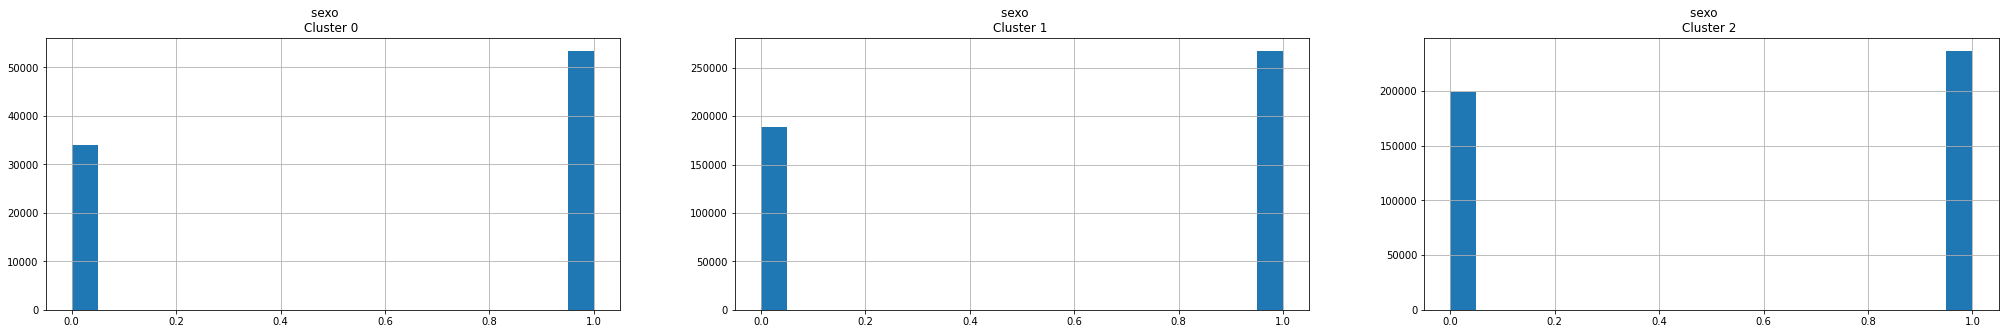

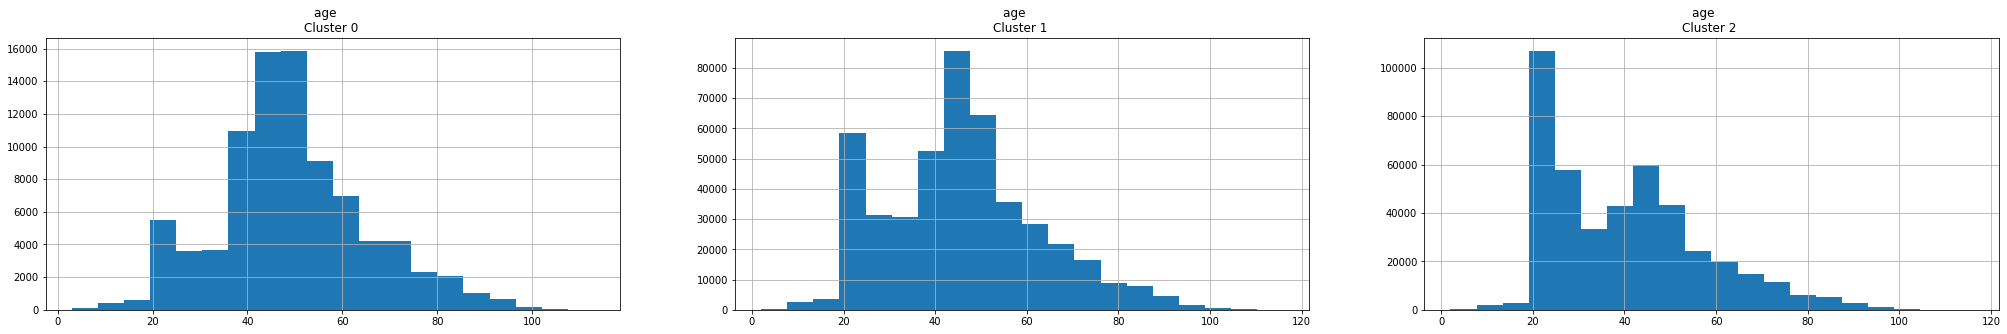

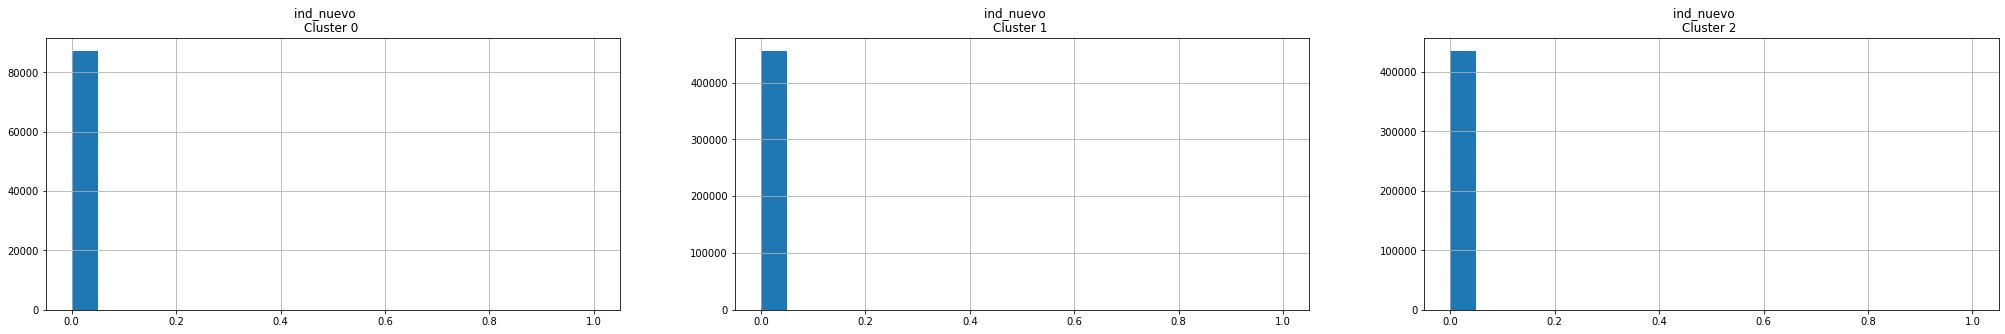

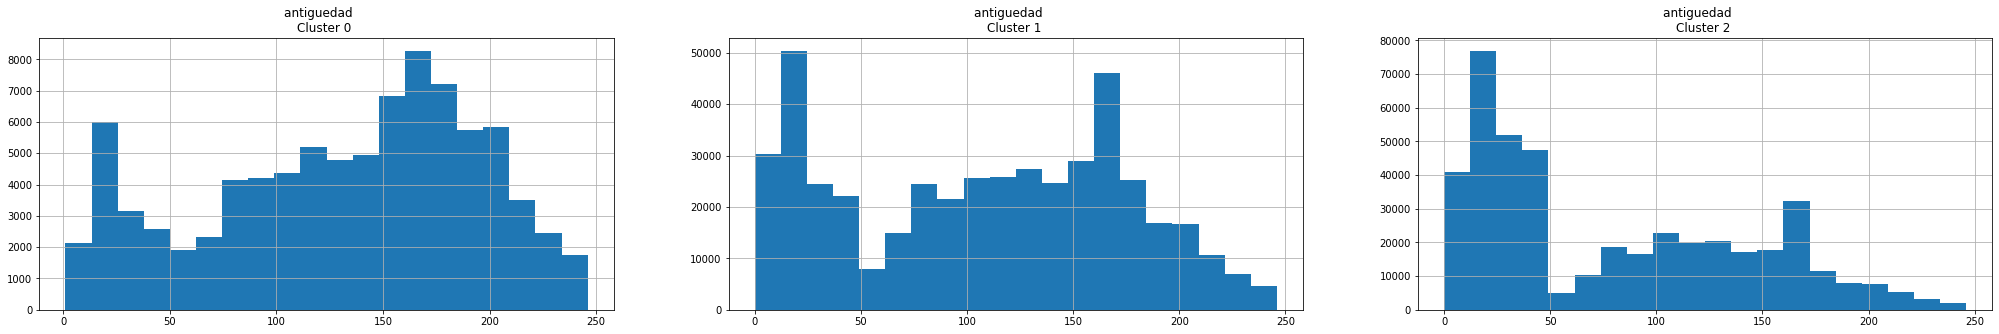

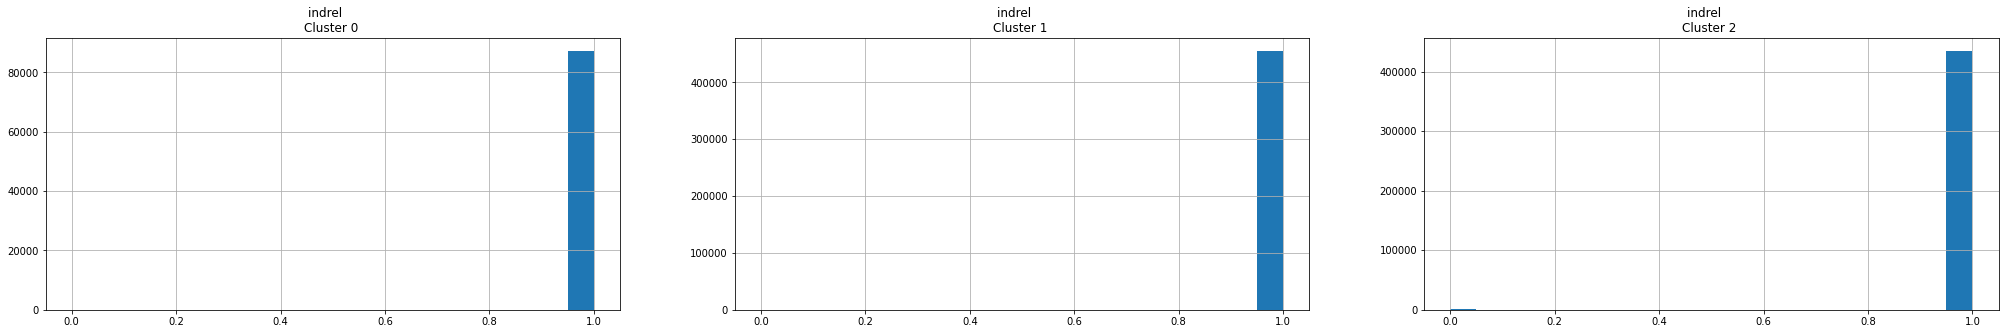

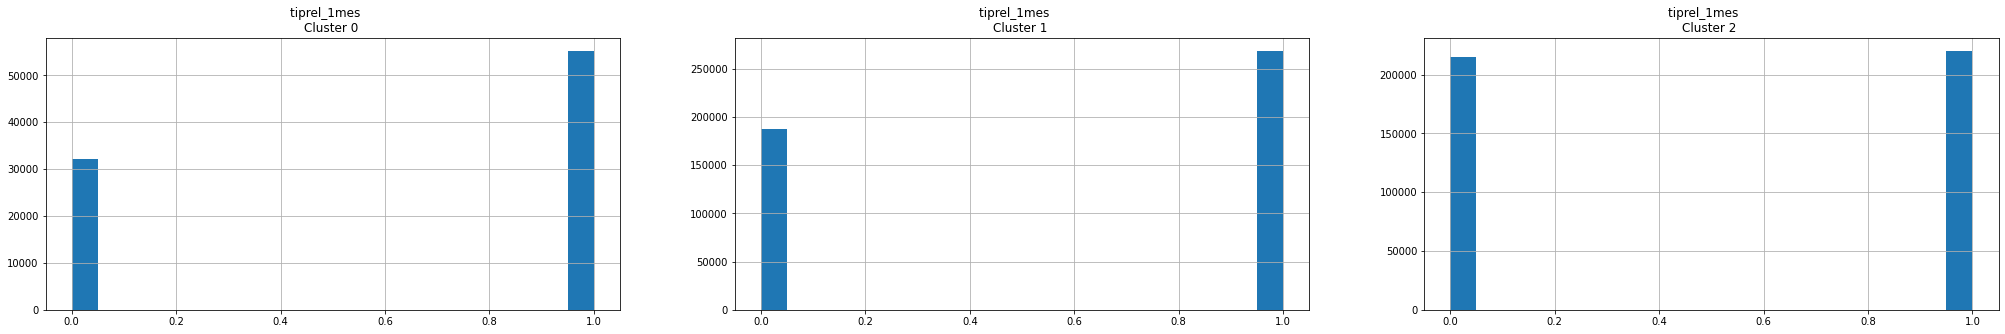

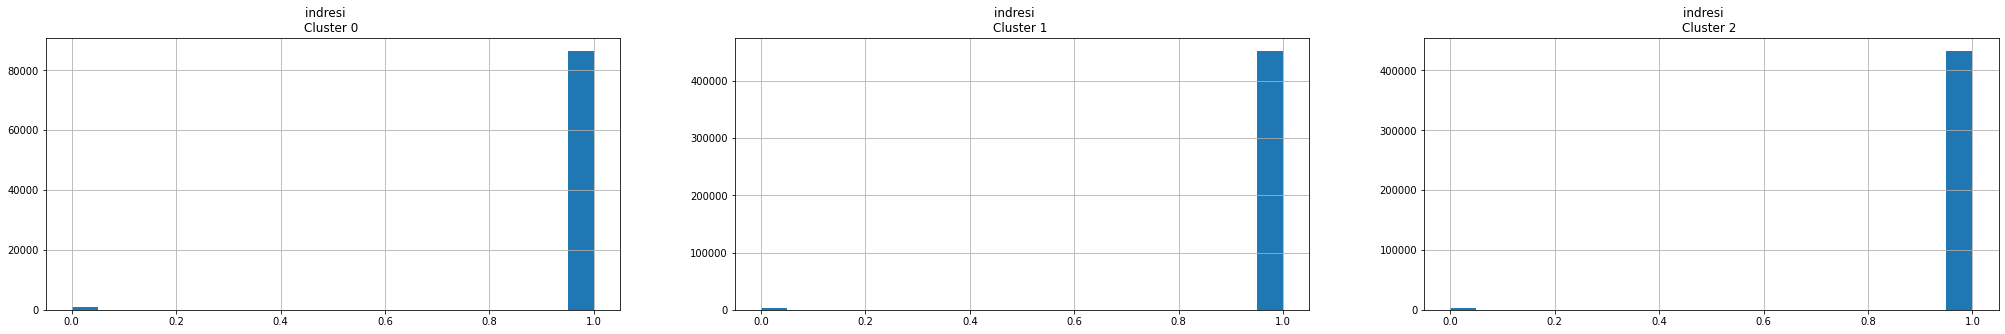

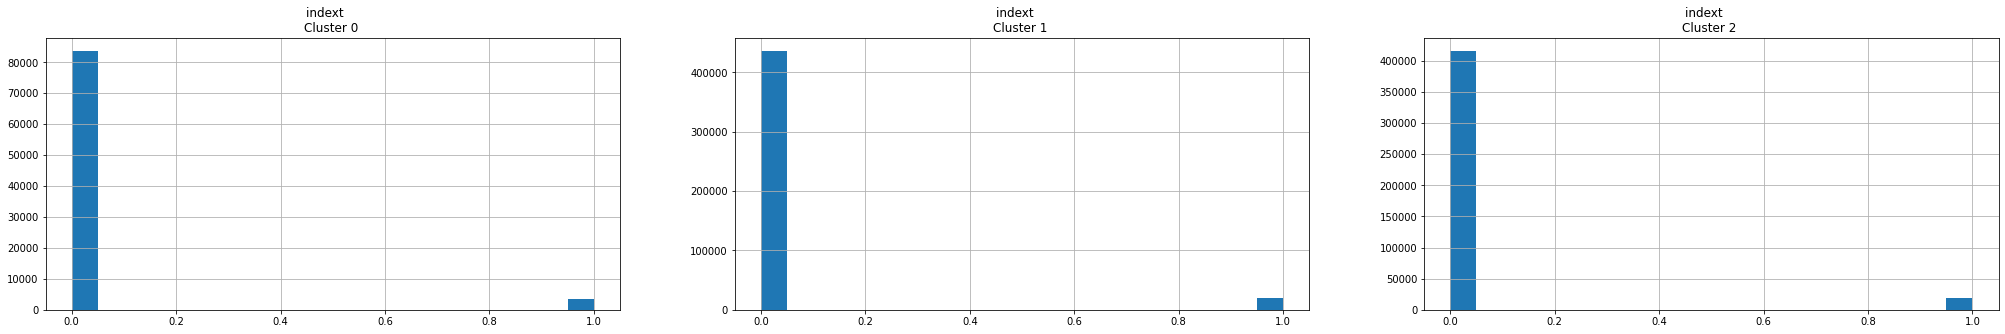

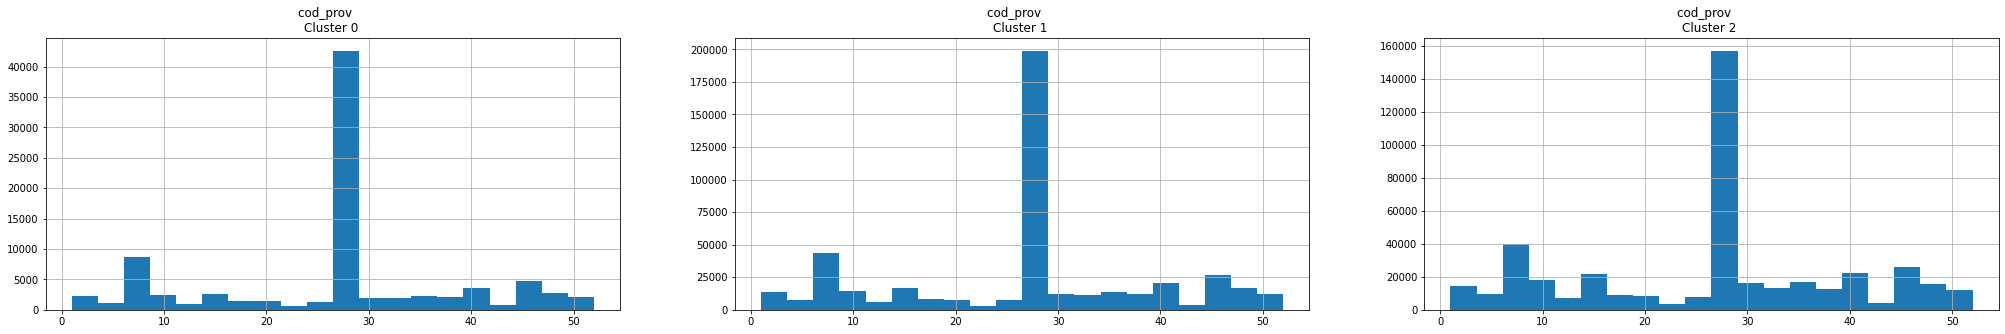

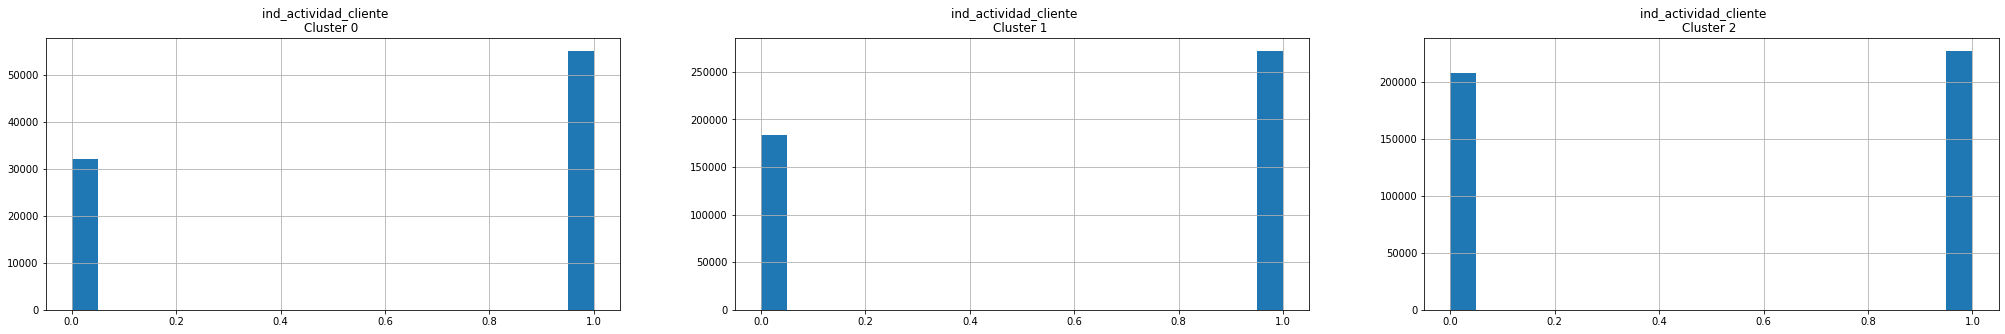

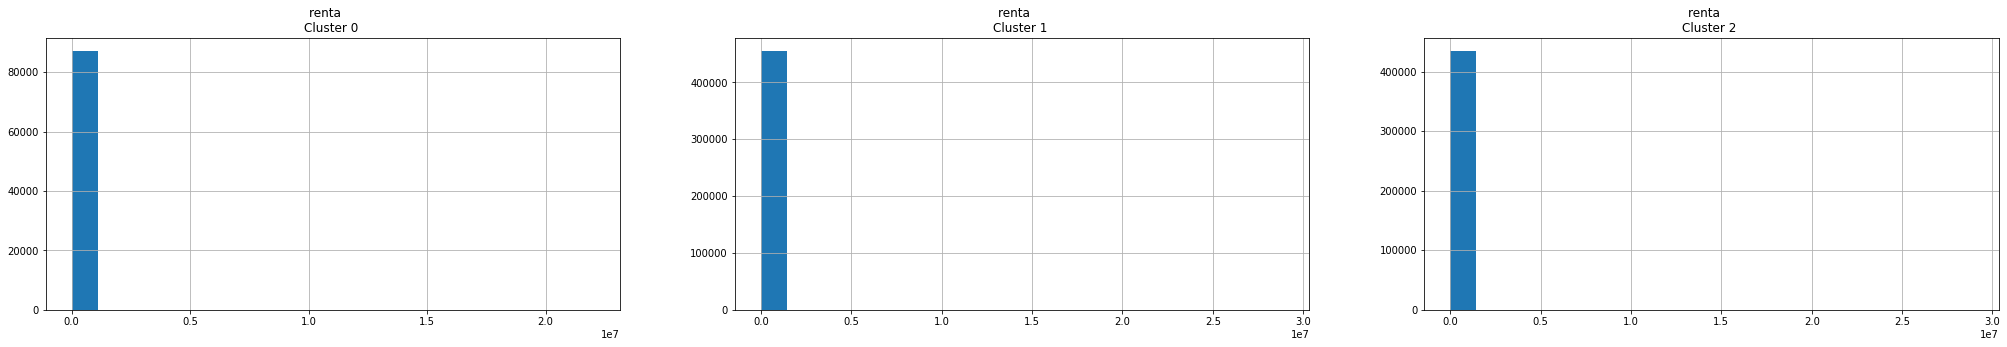

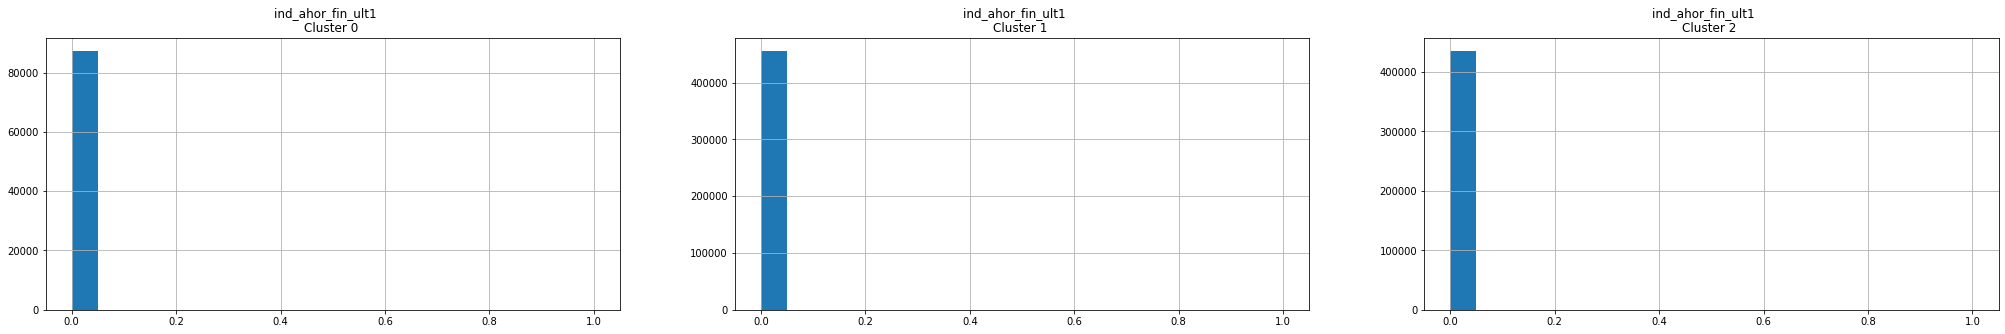

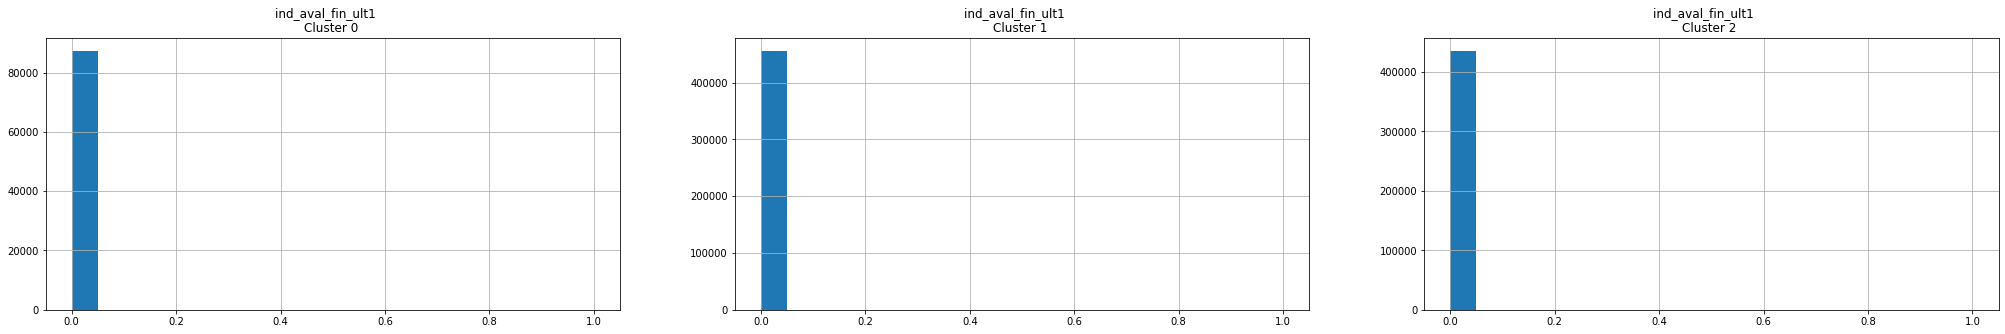

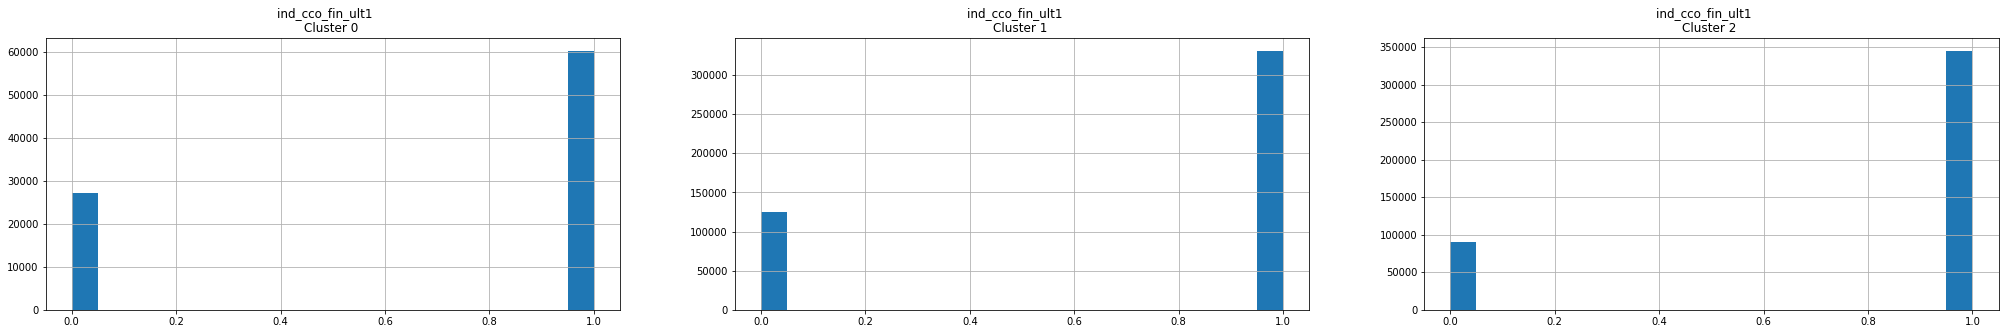

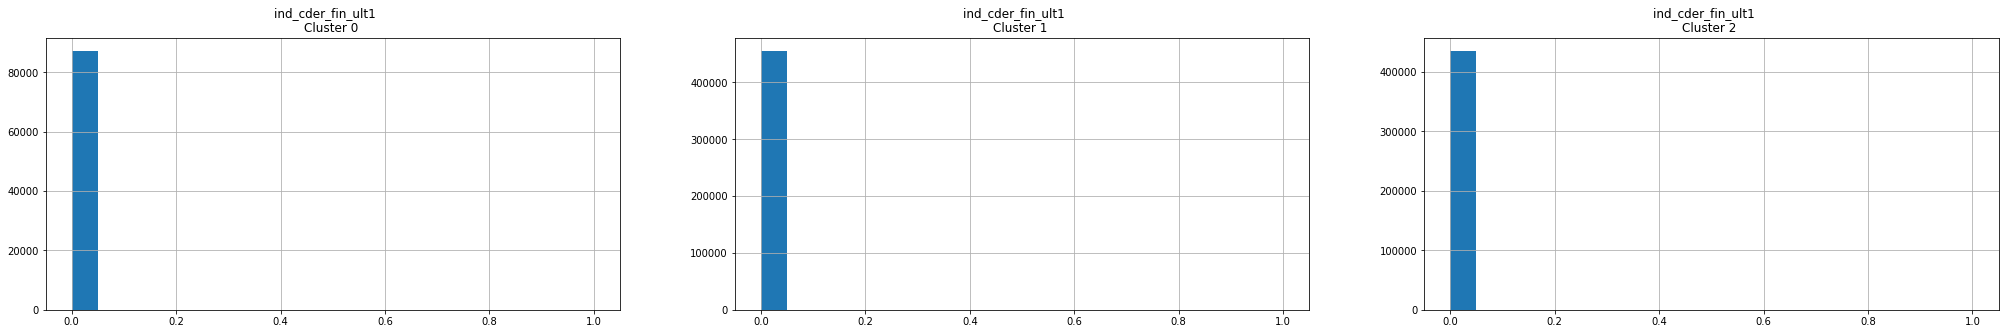

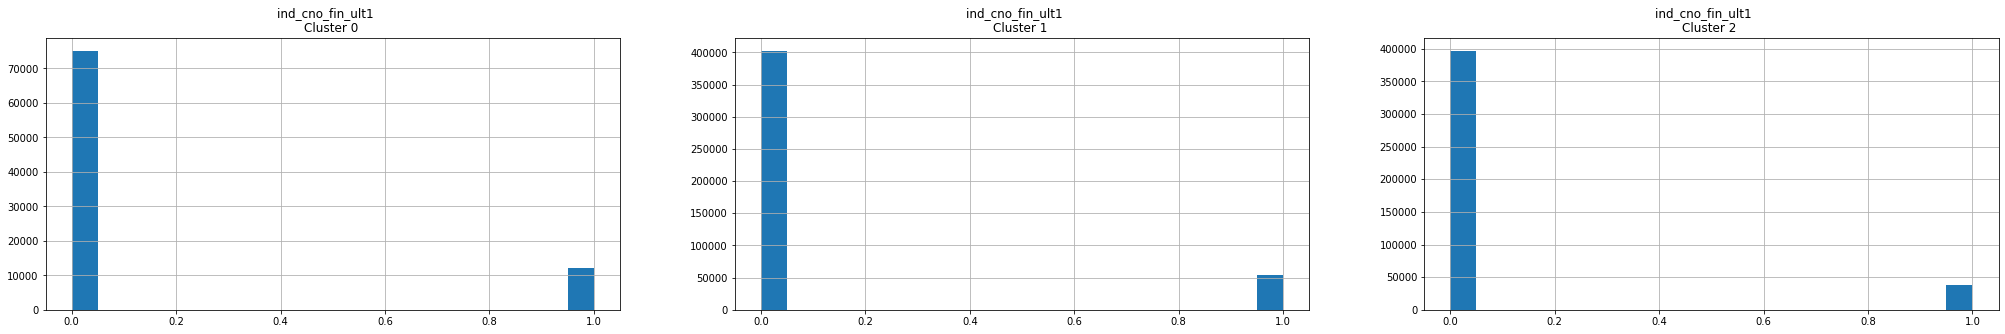

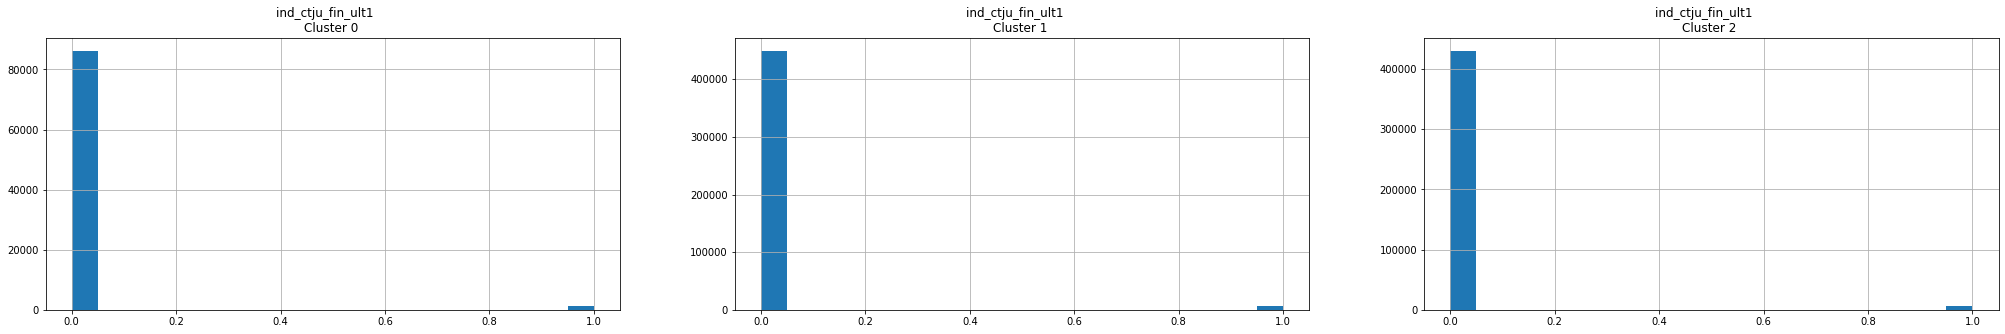

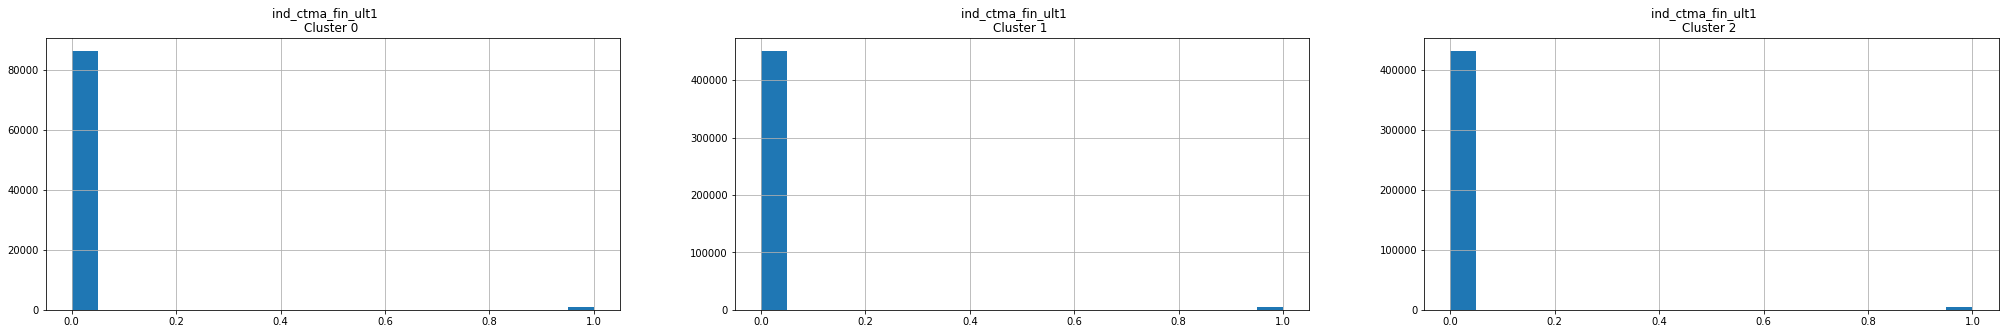

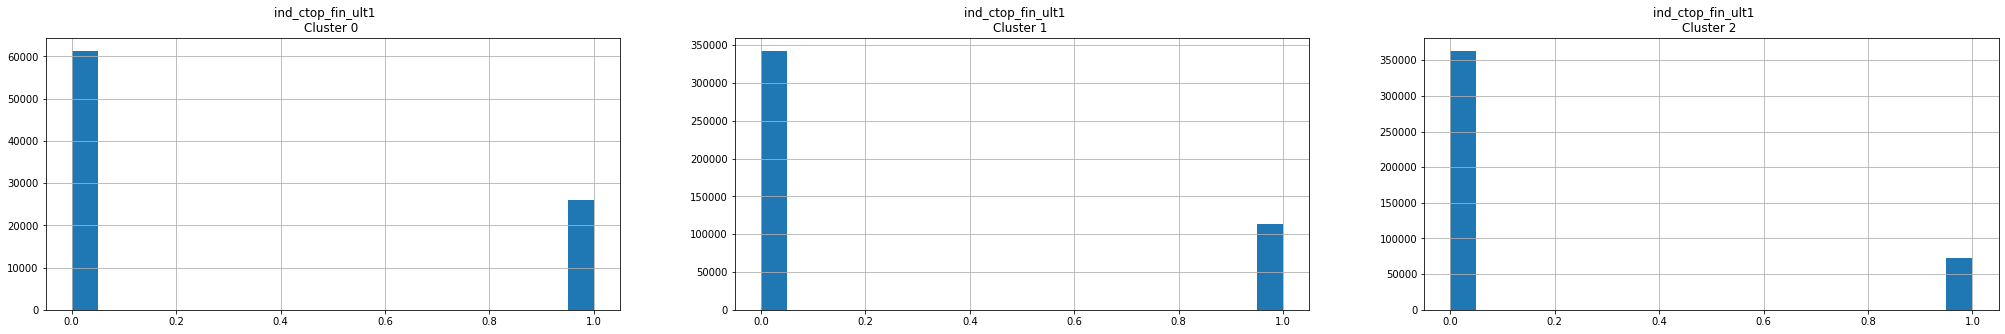

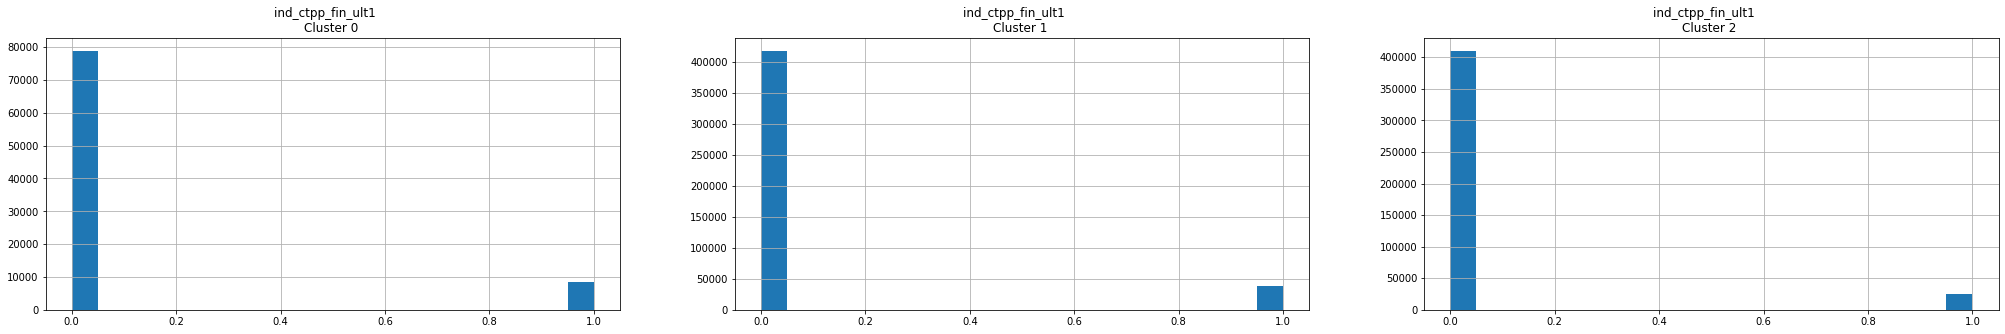

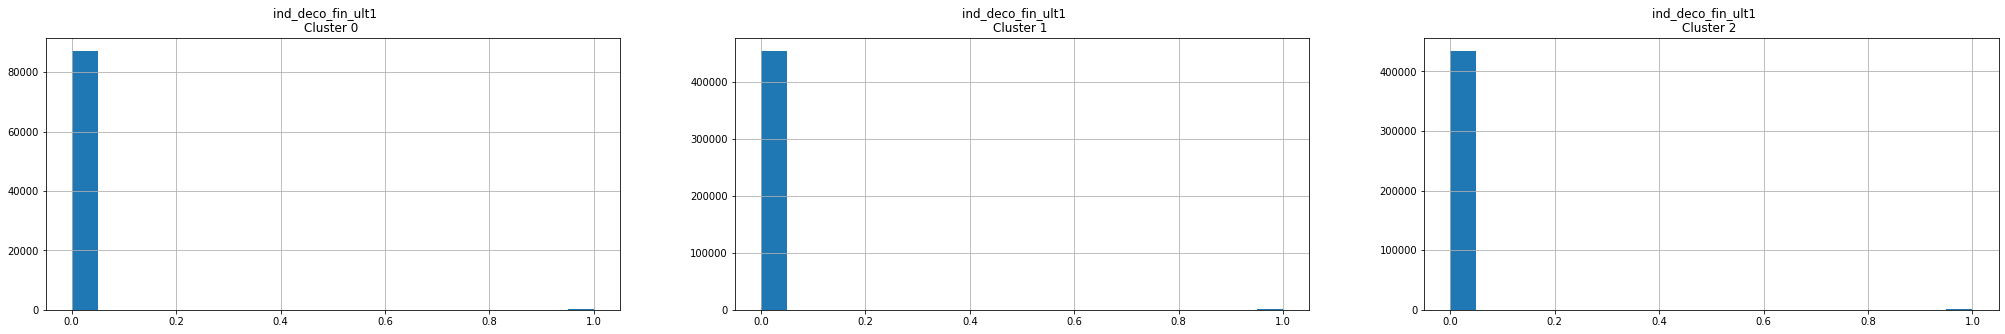

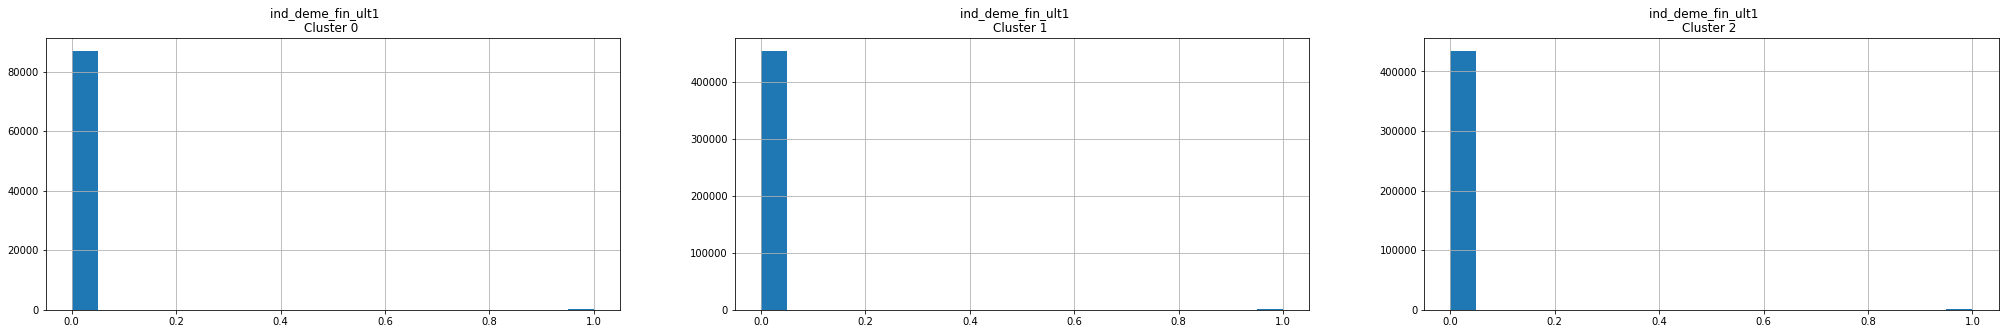

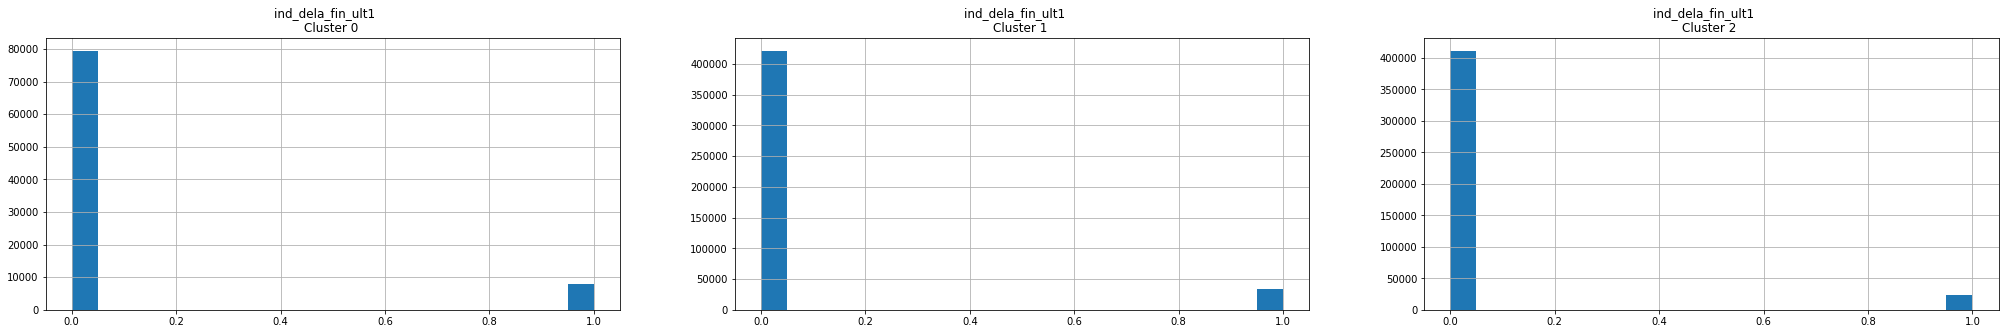

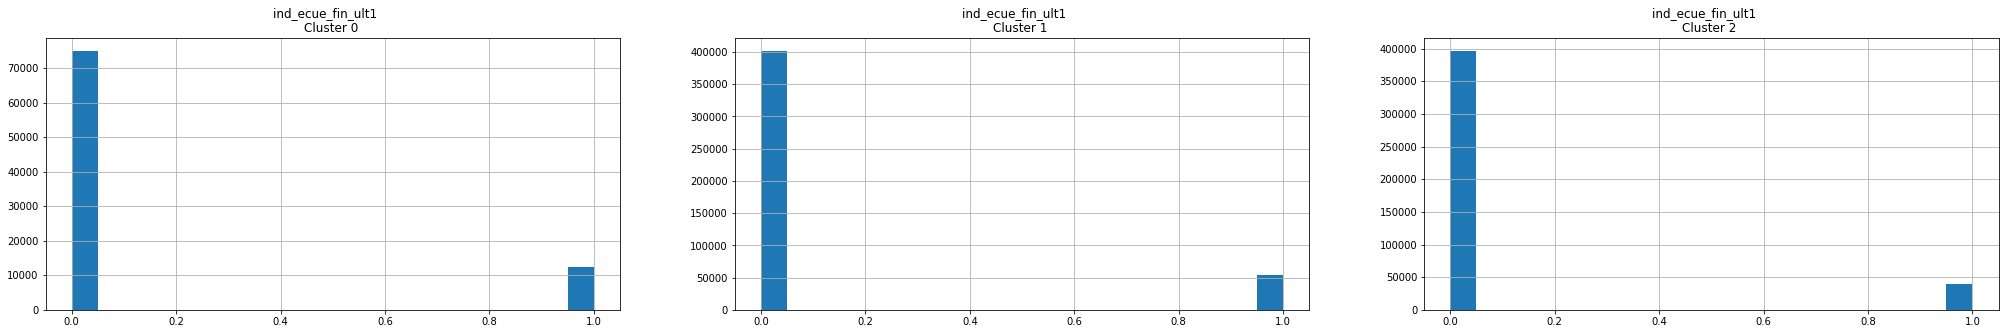

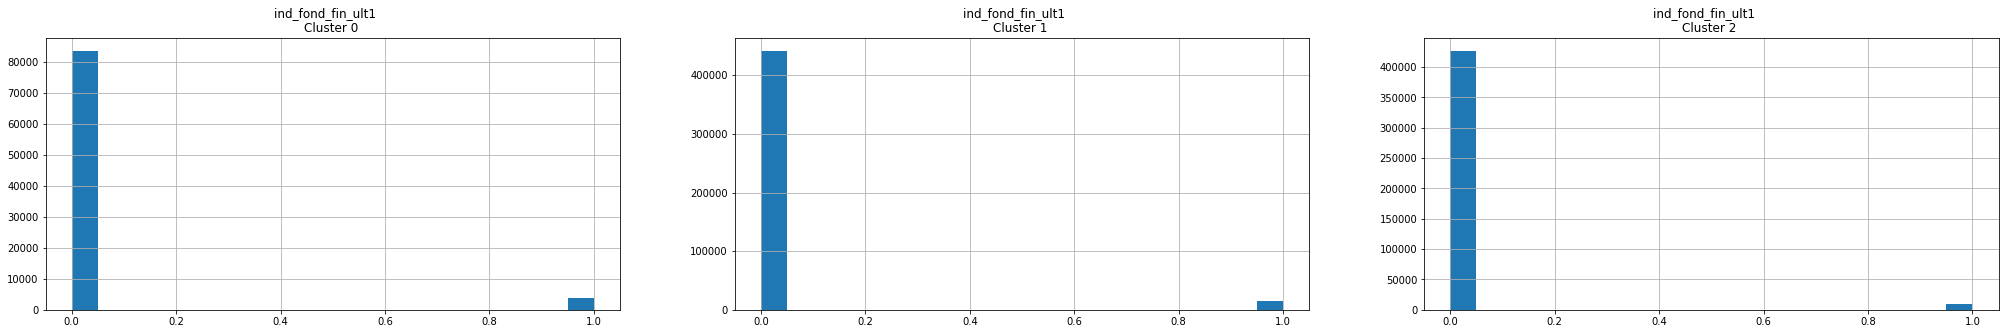

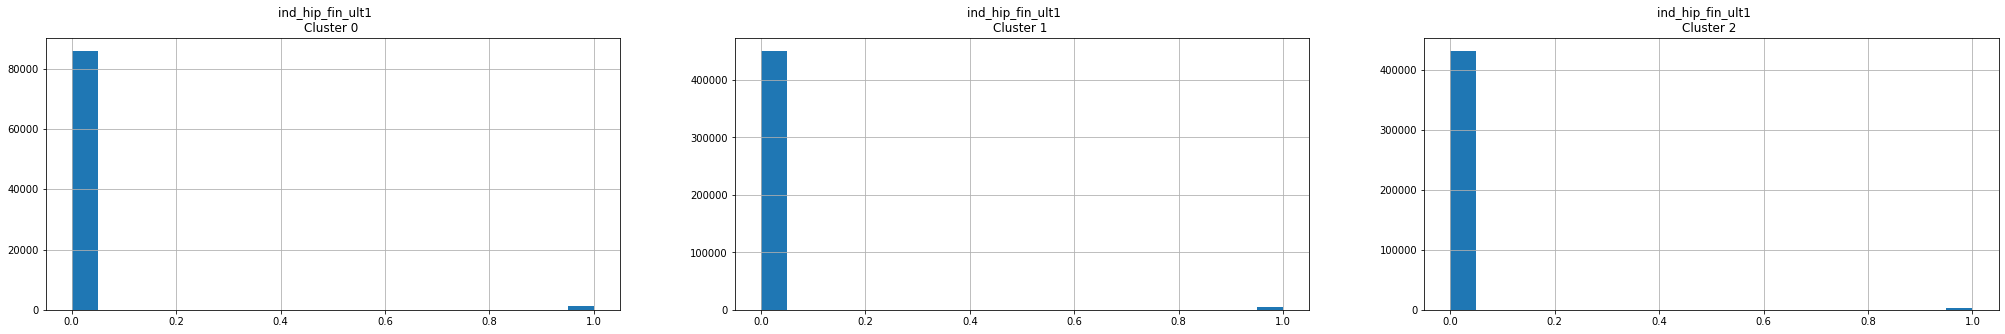

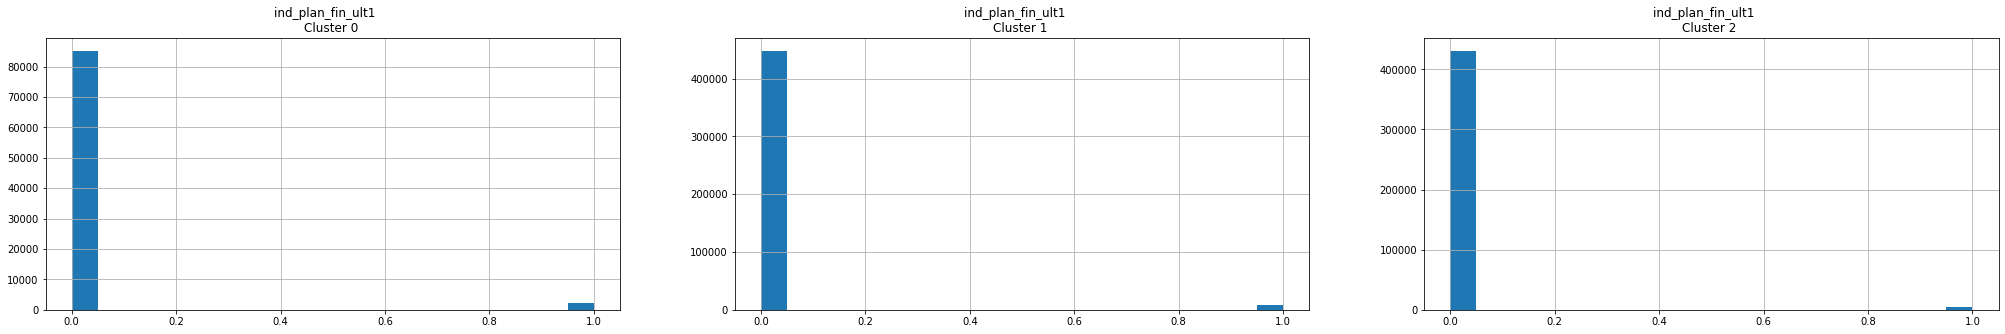

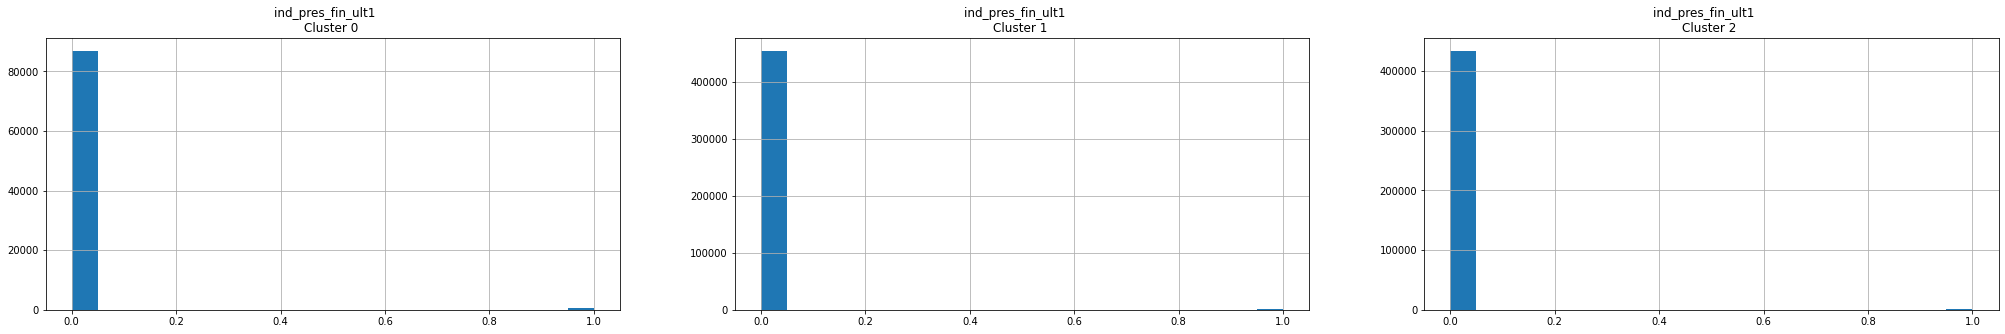

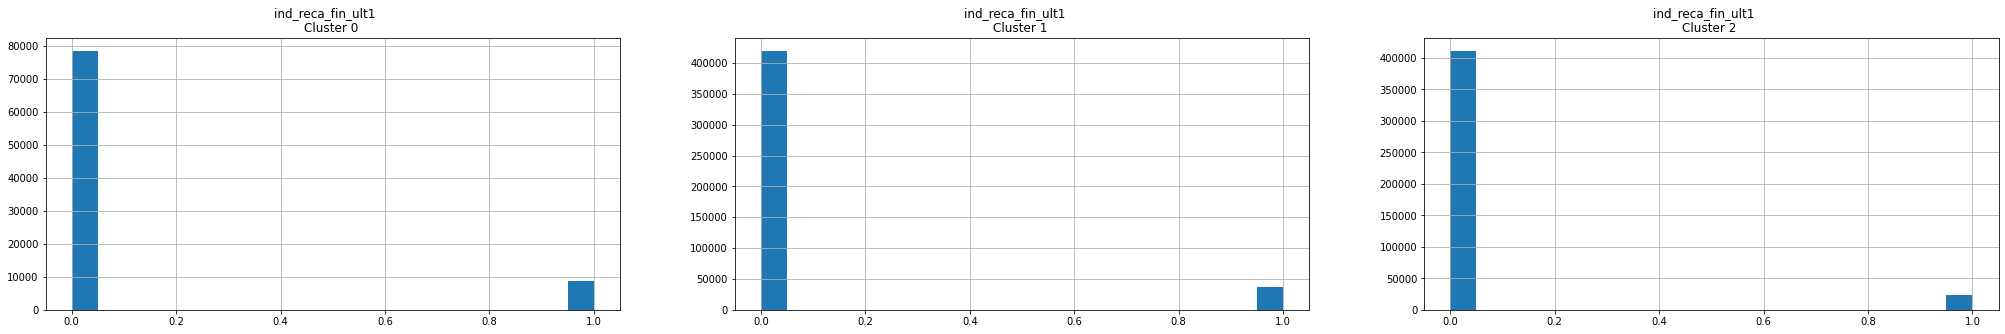

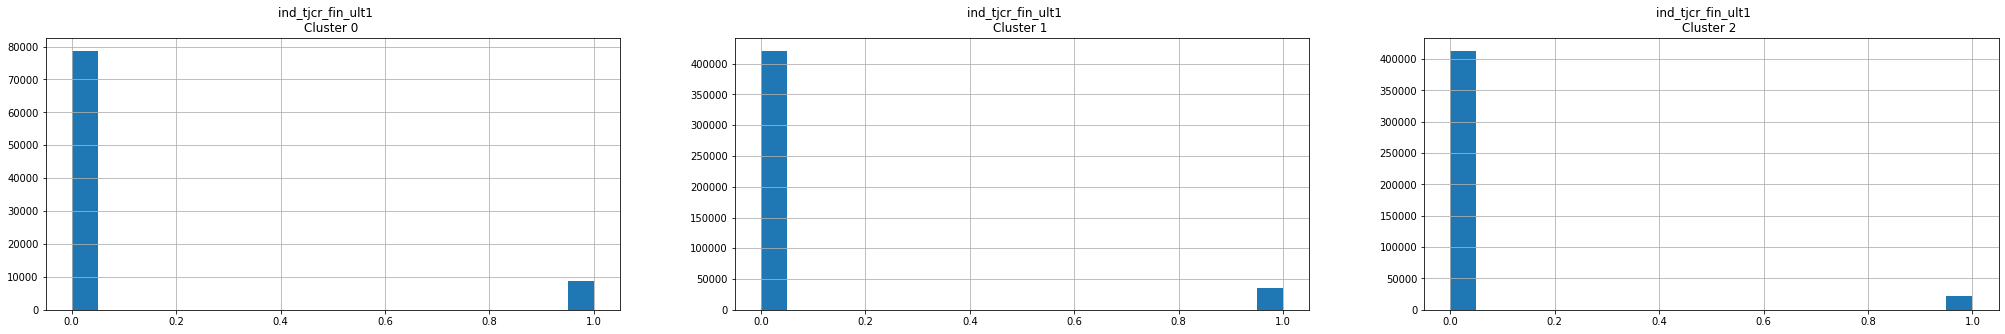

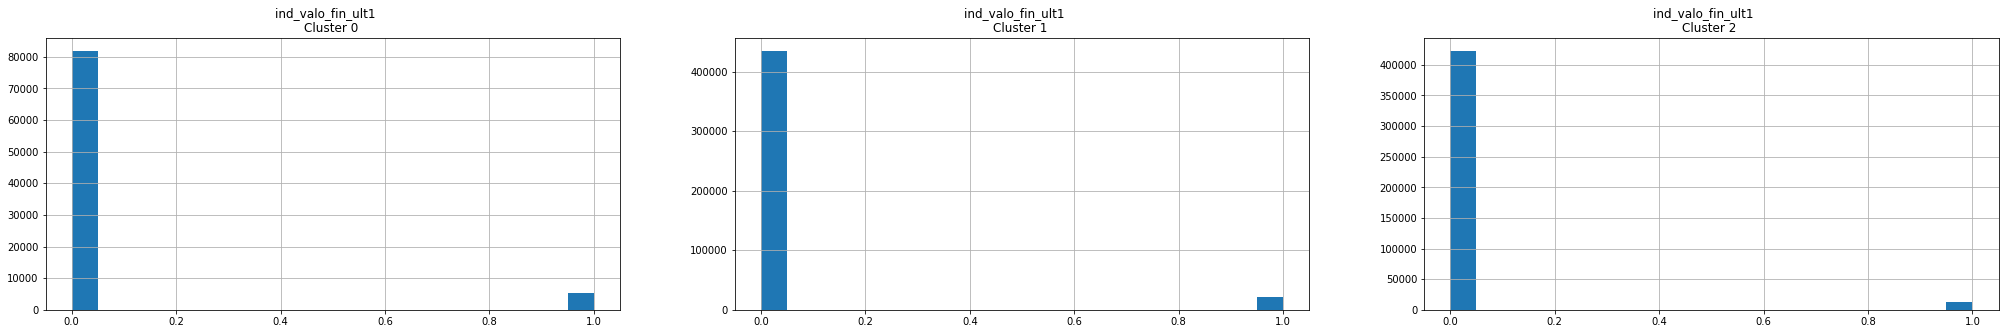

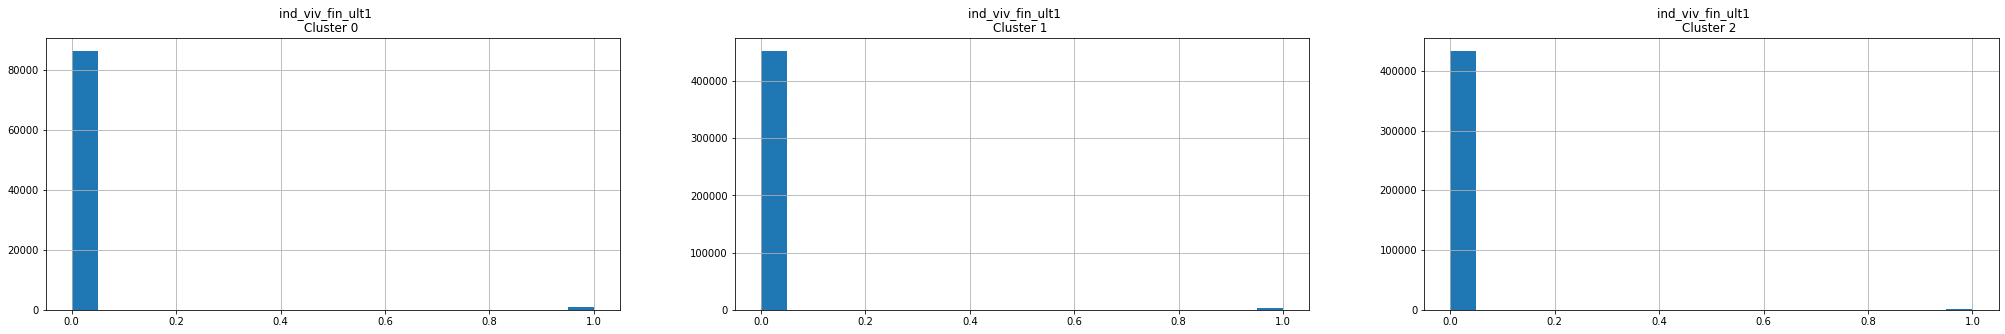

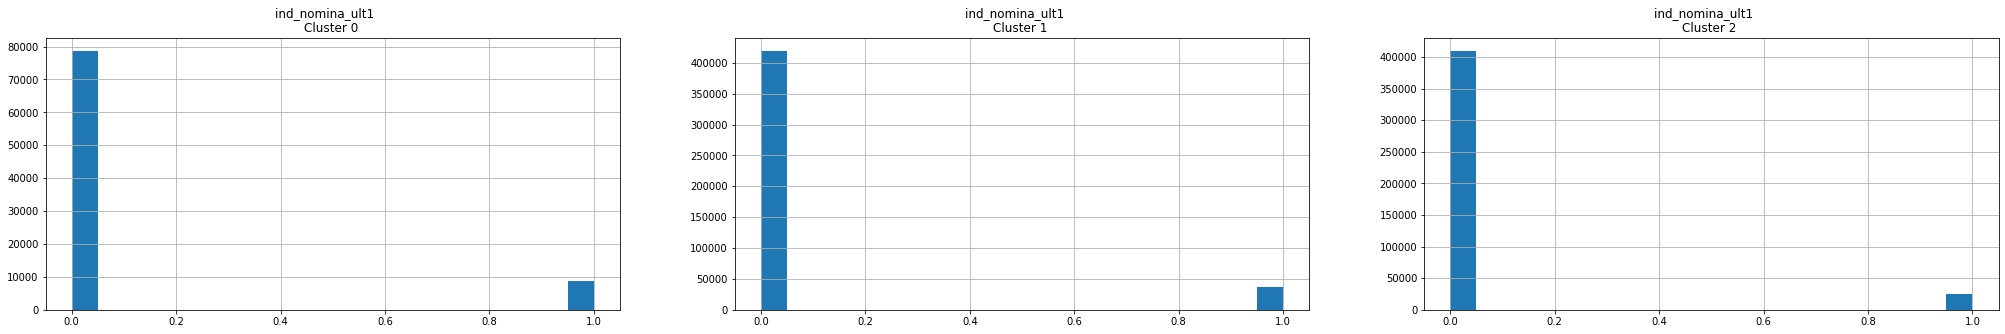

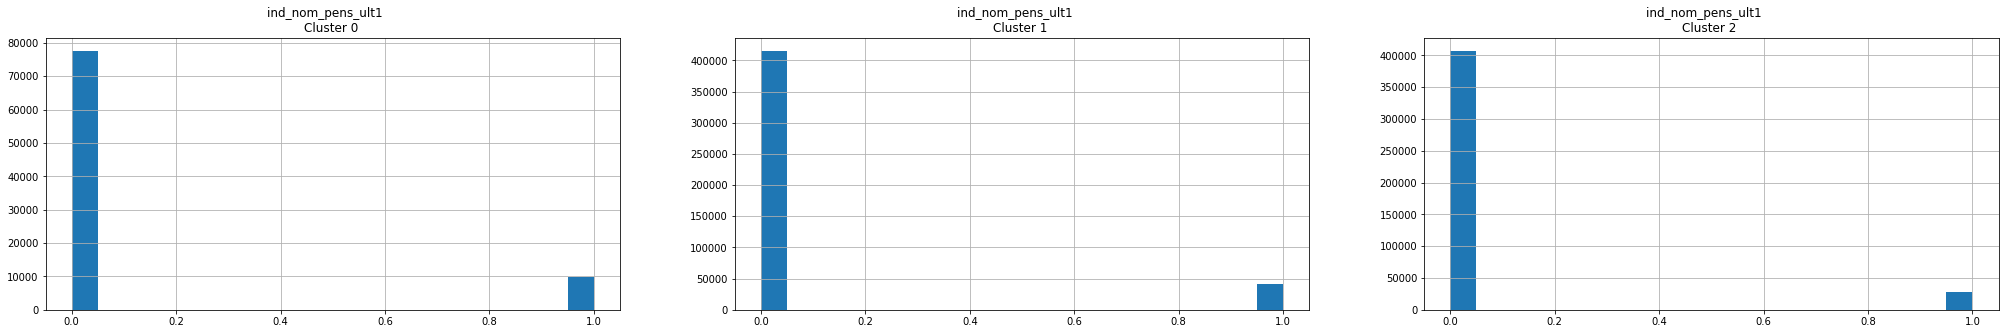

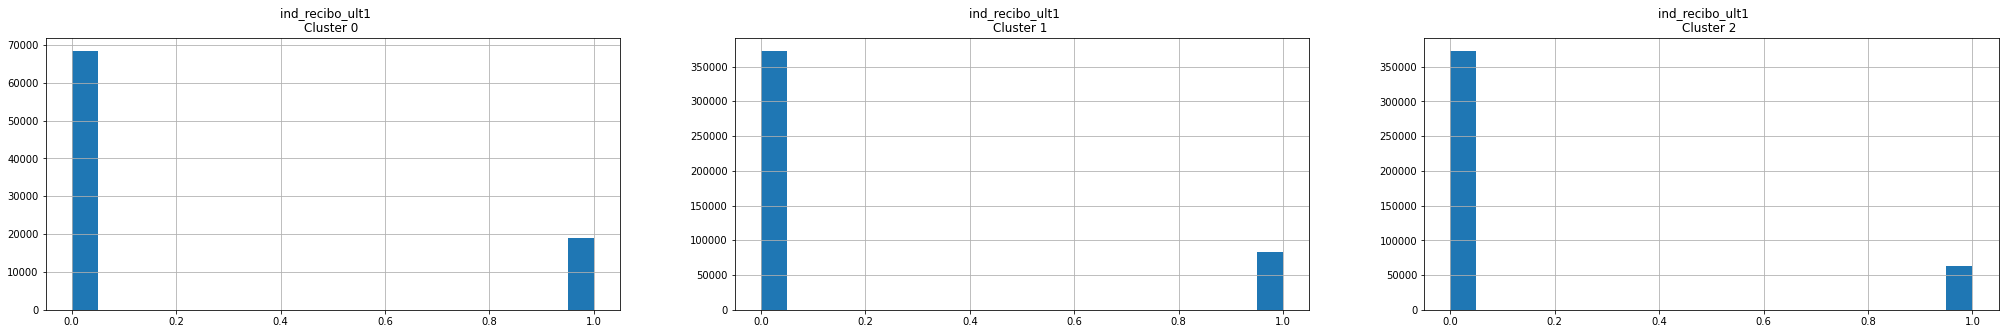

In [ ]:
# Plot the histogram of various clusters
for i in df2.columns:
  plt.figure(figsize = (35, 5))
  for j in range(3):
    plt.subplot(1,3,j+1)
    cluster = df2_cluster[df2_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

### Plotting the Clusters (Base Model)

In [ ]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df2_scaled)
principal_comp

array([[-0.89256236, -0.67488572],
       [-1.95507821, -1.48049912],
       [-1.87558359, -1.32254747],
       ...,
       [ 1.86051728, -1.42432763],
       [ 0.03309589, -0.65280428],
       [ 0.00810186, -0.83113228]])

In [ ]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-0.892562,-0.674886
1,-1.955078,-1.480499
2,-1.875584,-1.322547
3,-1.331630,-1.358327
4,-0.762612,-0.307871


In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,df2_cluster['cluster']], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-0.892562,-0.674886,1.0
1,-1.955078,-1.480499,2.0
2,-1.875584,-1.322547,2.0
3,-1.331630,-1.358327,2.0
4,-0.762612,-0.307871,1.0


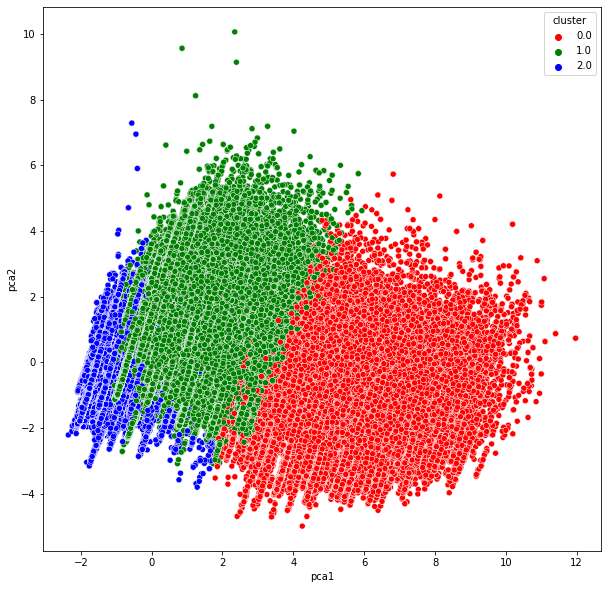

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue'])
plt.show()

### Using Auto Encoder to Perform Better Dimensionality Reduction

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 3

input_df = Input(shape=(35,))


x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(35, kernel_initializer = 'glorot_uniform')(x)

autoencoder = Model(input_df, decoded)

encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


In [ ]:
df2_scaled.shape

(989173, 35)

In [ ]:
autoencoder.fit(df2_scaled, df2_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
7728/7728 [==============================] - 431s 56ms/step - loss: 0.2994
Epoch 2/25
7728/7728 [==============================] - 429s 56ms/step - loss: 0.1923
Epoch 3/25
7728/7728 [==============================] - 430s 56ms/step - loss: 0.1709
Epoch 4/25
7728/7728 [==============================] - 435s 56ms/step - loss: 0.1543
Epoch 5/25
7728/7728 [==============================] - 431s 56ms/step - loss: 0.1458
Epoch 6/25
7728/7728 [==============================] - 431s 56ms/step - loss: 0.1374
Epoch 7/25
7728/7728 [==============================] - 429s 55ms/step - loss: 0.1192
Epoch 8/25
7728/7728 [==============================] - 429s 55ms/step - loss: 0.1141
Epoch 9/25
7728/7728 [==============================] - 427s 55ms/step - loss: 0.1178
Epoch 10/25
7728/7728 [==============================] - 425s 55ms/step - loss: 0.1060
Epoch 11/25
7728/7728 [==============================] - 424s 55ms/step - loss: 0.1077
Epoch 12/25
7728/7728 [=============================

In [ ]:
autoencoder.save_weights('autoencoder_custseg.h5')

In [ ]:
pred = encoder.predict(df2_scaled)

In [ ]:
pred.shape

(989173, 10)

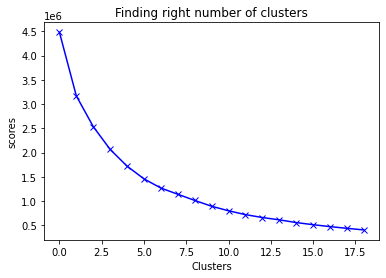

In [ ]:
# Finding the optimal number of cluster using Elbow Methos
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

Using the elbow method, we can see that 5 is the optimal number of cluster.

In [ ]:
kmeans = KMeans(5)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(df2_scaled)

In [ ]:
kmeans.cluster_centers_.shape

(5, 35)

In [ ]:
cluster_centers2 = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df2.columns])
cluster_centers2 = scaler.inverse_transform(cluster_centers2)
cluster_centers2 = pd.DataFrame(data = cluster_centers2, columns = [df2.columns])
cluster_centers2

,sexo,age,ind_nuevo,antiguedad,indrel,tiprel_1mes,indresi,indext,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0.524796,39.261044,-1.960509e-15,78.530840,0.998039,0.044094,0.992536,0.051558,26.443065,0.069309,187611.110430,8.207354e-05,-1.373142e-16,0.812617,6.839462e-06,0.002328,6.958013e-03,0.006242,0.133392,0.029264,0.000976,3.647713e-05,0.001350,0.014071,2.649964e-14,1.823857e-05,7.751390e-05,1.048717e-04,0.010417,0.000616,0.000244,6.693431e-15,0.000068,0.000176,0.004820
1,0.601446,46.369254,-1.449145e-15,107.355812,0.999595,0.955740,0.992168,0.037590,27.187323,0.956174,195538.318888,2.540027e-04,1.313807e-05,0.817731,1.053235e-03,0.041757,2.277266e-02,0.012928,0.290233,0.079080,0.003052,5.634043e-03,0.113966,0.132243,4.435632e-02,7.302579e-03,1.973120e-02,8.077725e-03,0.071567,0.061125,0.060974,-3.818126e-15,0.000090,0.000769,0.196368
2,0.607038,47.100318,3.007577e-16,133.075521,0.999586,0.997402,0.998908,0.032914,27.203327,0.993562,189510.741043,1.034685e-04,3.793845e-04,0.138073,1.069174e-03,0.959785,4.598600e-05,0.011577,0.202338,0.249750,0.001897,5.886208e-03,0.156720,0.439914,7.478473e-02,7.418691e-02,5.970132e-02,4.288194e-03,0.352034,0.422393,0.122001,1.209883e-14,0.804123,0.890116,0.825414
3,0.617450,44.794183,1.000000e+00,3.955257,0.955257,0.827740,1.000000,0.017897,26.876957,0.762864,201080.288725,1.219727e-18,2.032879e-19,0.664430,2.710505e-18,0.038031,1.789709e-02,0.058166,0.033557,0.020134,0.069351,-1.647987e-17,0.026846,0.046980,2.775558e-17,-7.285839e-17,-1.006140e-16,2.775558e-17,0.038031,0.008949,0.002237,-2.949030e-17,0.015660,0.015660,0.064877
4,0.626401,44.677927,4.358493e-17,161.646326,1.000000,0.755448,0.998755,0.036893,27.451276,0.781133,203266.540297,2.490660e-03,-2.405574e-18,0.615349,1.867995e-03,0.222291,-1.509209e-16,0.000156,0.471202,0.181351,0.001401,7.004981e-03,0.077055,0.126245,5.790785e-02,1.463263e-02,4.467621e-02,2.490660e-03,0.233655,0.160336,0.111924,1.000000e+00,0.171544,0.174813,0.337484


### Clusters (Auto Encoder)
**Cluster 0:** These customers have the following notable attributes:
- Seniority (~78 months)
- Inactive Customer
- Low Income (~187000)
- Current Accounts
- No Payroll Account
- No Payrolls
- No Pensions
- No Direct Debit

**Cluster 1:** These customers have the following notable attributes:
- Seniority (~107 months)
- Active Customer
- Medium income (~195000)
- Current Accounts
- No Payroll Account
- No Payrolls
- No Pensions
- No Direct Debit

**Cluster 2:** These customers have the following notable attributes:
- Seniority (~133 months)
- Active Customer
- Low Income (~189000)
- Current Accounts
- Payroll Account
- Payrolls
- Pensions
- Direct Debit

**Cluster 3:** These customers have the following notable attributes:
- Seniority (~4 months)
- Active Customer
- High Income (~201000)
- No Payroll Account
- No Payrolls
- No Pensions
- No Direct Debit

**Cluster 4:** These customers have the following notable attributes:
- Seniority (~161 months)
- Active Customer
- High Income (~203000)
- No Payroll Account
- No Payrolls
- No Pensions
- No Direct Debit

In [ ]:
df2_cluster_ae = pd.concat([df2, pd.DataFrame({'cluster':labels})], axis = 1)
df2_cluster_ae.head()

,sexo,age,ind_nuevo,antiguedad,indrel,tiprel_1mes,indresi,indext,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,cluster
0,0.0,35.0,0.0,6.0,1.0,1.0,1.0,0.0,29.0,1.0,87218.10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,23.0,0.0,35.0,1.0,0.0,1.0,1.0,13.0,0.0,35548.74,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,1.0,23.0,0.0,35.0,1.0,0.0,1.0,0.0,13.0,0.0,122179.11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,22.0,0.0,35.0,1.0,0.0,1.0,0.0,50.0,0.0,119775.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,1.0,23.0,0.0,35.0,1.0,1.0,1.0,0.0,50.0,1.0,451931.22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pca2 = PCA(n_components=2)
prin_comp2 = pca2.fit_transform(pred)
pca_df2 = pd.DataFrame(data = prin_comp2, columns =['pca1','pca2'])
pca_df2.head()

,pca1,pca2
0,0.025973,-0.126913
1,0.737948,1.049348
2,-0.319742,0.005478
3,8.549463,6.176817
4,0.138702,-0.192480


In [ ]:
pca_df2 = pd.concat([pca_df2,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df2.head()

,pca1,pca2,cluster
0,0.025973,-0.126913,0
1,0.737948,1.049348,4
2,-0.319742,0.005478,0
3,8.549463,6.176817,3
4,0.138702,-0.192480,0


### Plotting the Clusters (Auto Encoder)

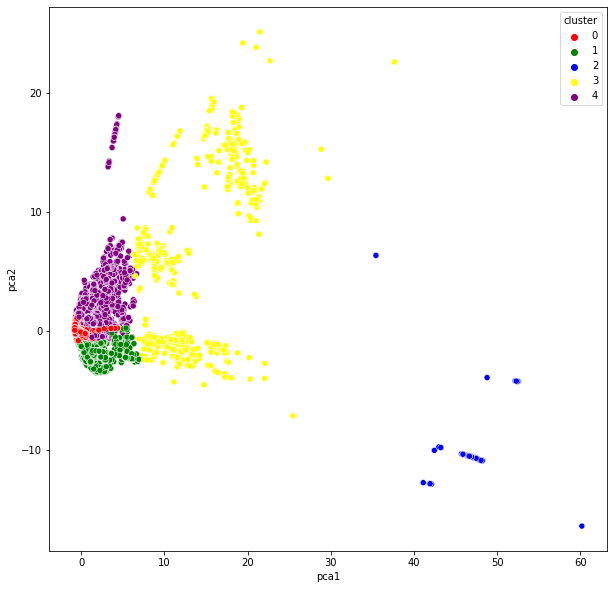

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df2, palette =['red','green','blue','yellow','purple'])
plt.show()